# Preprocesamiento de Datos

## Índice de Contenido

1. [Carga de datos brutos](#1-Carga-de-datos-brutos)  
2. [Transformación de códigos a etiquetas descriptivas](#2-Transformación-de-códigos-a-etiquetas-descriptivas)  
3. [Extracción de la variable de género](#3-Extracción-de-la-variable-de-género)  
4. [Creación de etiquetas categóricas para la variable objetivo](#4.-Creación-de-etiquetas-categóricas-para-la-variable-objetivo)  
5. [Verificación de consistencia de los datos](#5.-Verificación-de-consistencia-de-los-datos)  
6. [Guardado de los datos procesados](#6.-Guardado-de-los-datos-procesados)  
7. [Resumen y conclusiones](#7.-Resumen-y-conclusiones)

## 1. Carga de datos brutos

Comenzamos cargando el conjunto de datos original 'german.data', que se encuentra en formato de texto 
con valores codificados (tanto numéricos como alfanuméricos). Estos datos requieren procesamiento 
para ser interpretables y utilizables en análisis posteriores.

In [1]:
import pandas as pd
import numpy as np
import os

ruta_archivo = os.path.join('..', 'data', 'raw', 'german.data')

g_credit_data = pd.read_csv(ruta_archivo, sep=' ', header=None, skipinitialspace=True)

print(f"Dimensiones del dataset: {g_credit_data.shape}")
print("\nPrimeras 5 filas de los datos brutos:")
g_credit_data.head()

Dimensiones del dataset: (1000, 21)

Primeras 5 filas de los datos brutos:


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Como podemos observar, los datos están en su formato bruto con columnas numeradas y valores codificados 
como "A11", "A32", etc. Estos códigos no son interpretables directamente y necesitan ser transformados 
en etiquetas que describan su significado real según la documentación del conjunto de datos.

El dataset contiene 1000 filas (solicitantes de crédito) y 21 columnas (atributos y la variable objetivo).

## 2. Transformación de códigos a etiquetas descriptivas

Para facilitar el análisis, transformaremos los códigos alfanuméricos a descripciones legibles utilizando
una función auxiliar que mapea estos códigos según la documentación oficial del German Credit Dataset.

In [2]:
from tp_final_fairness_ML.utils.preprocessing import mapear_german_credit_data

g_credit_data = mapear_german_credit_data(g_credit_data)

print("\nPrimeras 5 filas de los datos con etiquetas descriptivas:")
g_credit_data.head()


Primeras 5 filas de los datos con etiquetas descriptivas:


,checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,target
0,< 0 DM,6,critical account / other bank,radio/TV,1169,unknown / no account,>= 7 years,4,"male, single",none,...,real estate,67,none,own,2,skilled / official,1,"yes, registered",yes,1
1,0 <= ... < 200 DM,48,paid duly till now,radio/TV,5951,< 100 DM,1 <= ... < 4 years,2,"female, div/sep/married",none,...,real estate,22,none,own,1,skilled / official,1,none,yes,2
2,no account,12,critical account / other bank,education,2096,< 100 DM,4 <= ... < 7 years,2,"male, single",none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,< 0 DM,42,paid duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,"male, single",guarantor,...,building society / insurance,45,none,for free,1,skilled / official,2,none,yes,1
4,< 0 DM,24,delay in past,car (new),4870,< 100 DM,1 <= ... < 4 years,3,"male, single",none,...,unknown / no property,53,none,for free,2,skilled / official,2,none,yes,2


Ahora los datos son mucho más interpretables. Cada columna tiene un nombre descriptivo 
(como "checking_account", "credit_history", etc.) y los valores son legibles en lenguaje natural 
en lugar de códigos crípticos.

## 3. Extracción de la variable de género

Observamos que la columna 'personal_status_sex' contiene información combinada sobre el estado civil 
y el género del solicitante. Para facilitar nuestro análisis de equidad, extraeremos específicamente 
la información de género en una nueva columna.

In [3]:
status_counts = g_credit_data['personal_status_sex'].value_counts()
print("Distribución de estado civil y género:")
print(status_counts)

Distribución de estado civil y género:
personal_status_sex
male, single                548
female, div/sep/married     310
male, married/widowed        92
male, divorced/separated     50
Name: count, dtype: int64


Podemos observar que la columna 'personal_status_sex' contiene cuatro categorías, donde solo una corresponde 
a mujeres (female, div/sep/married) y las otras tres a hombres con diferentes estados civiles. 

Para facilitar el análisis de equidad por género, necesitamos crear una nueva columna 'genre' que 
contenga exclusivamente la información de género (masculino o femenino).

In [4]:
from tp_final_fairness_ML.utils.preprocessing import extraer_genero

g_credit_data = extraer_genero(g_credit_data, 'genre')

print("\nComparación entre personal_status_sex y genre:")
g_credit_data[['personal_status_sex', 'genre']].head(10)


Comparación entre personal_status_sex y genre:


,personal_status_sex,genre
0,"male, single",male
1,"female, div/sep/married",female
2,"male, single",male
3,"male, single",male
4,"male, single",male
5,"male, single",male
6,"male, single",male
7,"male, single",male
8,"male, divorced/separated",male
9,"male, married/widowed",male


## 4. Creación de etiquetas categóricas para la variable objetivo

La variable objetivo 'target' actualmente está codificada como 1 (bajo riesgo) y 2 (alto riesgo).
Para mejorar la interpretabilidad, especialmente en visualizaciones futuras, crearemos una nueva
columna 'target_label' con etiquetas descriptivas.

In [5]:
g_credit_data['target_label'] = g_credit_data['target'].map({1: 'low_risk', 2: 'high_risk'})

print("\nVerificación de la transformación de target a target_label:")
g_credit_data[['target', 'target_label']].head(10)


Verificación de la transformación de target a target_label:


,target,target_label
0,1,low_risk
1,2,high_risk
2,1,low_risk
3,1,low_risk
4,2,high_risk
5,1,low_risk
6,1,low_risk
7,1,low_risk
8,1,low_risk
9,2,high_risk


## 5. Verificación de consistencia de los datos

Antes de guardar los datos procesados, es fundamental verificar la calidad y consistencia del dataset:
- Comprobar que no hay valores faltantes
- Verificar que los tipos de datos son correctos
- Confirmar que todas las columnas esperadas están presentes

In [6]:
print("\nEstructura del dataset procesado:")
g_credit_data.info()

print("\nEstadísticas descriptivas de las variables numéricas:")
g_credit_data.describe()


Estructura del dataset procesado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   checking_account         1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   credit_amount            1000 non-null   int64 
 5   savings_account          1000 non-null   object
 6   employment_since         1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  residence_since          1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housin

,duration,credit_amount,installment_rate,residence_since,age,number_credits,people_liable,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


Confirmamos que:
- El dataset tiene 1000 registros y 23 columnas (las 21 originales más 'genre' y 'target_label')
- No hay valores nulos en ninguna columna
- Las variables numéricas y categóricas tienen los tipos de datos adecuados
- Las distribuciones de las variables parecen razonables

## 6. Guardado de los datos procesados

Finalmente, guardamos el dataset procesado en formato CSV para su uso en las etapas posteriores
del proyecto.

In [7]:
ruta_guardado = os.path.join('..', 'data', 'processed', 'german_credit_data.csv')

g_credit_data.to_csv(ruta_guardado, index=False)
print(f"\nDatos procesados guardados en: {ruta_guardado}")


Datos procesados guardados en: ..\data\processed\german_credit_data.csv


## 7. Resumen y conclusiones

En este notebook hemos completado las siguientes tareas de preprocesamiento:

1. **Carga de datos**: Importamos el conjunto de datos German Credit en su formato bruto
2. **Transformación**: Convertimos los códigos a etiquetas descriptivas en lenguaje natural
3. **Extracción de género**: Aislamos la variable de género para facilitar el análisis de equidad
4. **Etiquetado de target**: Creamos etiquetas descriptivas para la variable objetivo
5. **Verificación**: Comprobamos la consistencia y calidad de los datos
6. **Guardado**: Almacenamos el dataset procesado para su uso posterior

# Análisis Exploratorio de Datos (EDA)

## Índice de Contenido

1. [Preparación del entorno y carga de datos](#1.-Preparación-del-entorno-y-carga-de-datos)
2. [Análisis de variables numéricas](#2.-Análisis-de-variables-numéricas)
   - [Distribuciones y estadísticas](#2.1-Distribuciones-y-estadísticas)
   - [Relación con la variable objetivo](#2.2-Relación-con-la-variable-objetivo)
3. [Análisis de variables categóricas](#3.-Análisis-de-variables-categóricas)
   - [Distribuciones](#3.1-Distribuciones)
   - [Relación con la variable objetivo](#3.2-Relación-con-la-variable-objetivo)
4. [Análisis de equidad por género](#4.-Análisis-de-equidad-por-género)
   - [Distribución por género](#4.1-Distribución-por-género)
   - [Tasas de aprobación por género](#4.2-Tasas-de-aprobación-por-género)
5. [Resumen y conclusiones](#5.-Resumen-y-conclusiones)

## 1. Preparación del entorno y carga de datos

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tp_final_fairness_ML.utils.preprocessing import convertir_object_a_categ
import os 

# Carga de datos
ruta_archivo = os.path.join('..', 'data', 'processed', 'german_credit_data.csv')
g_credit_data = pd.read_csv(ruta_archivo)

# Conversión de columnas tipo objeto a categóricas para mejor manejo
g_credit_data = convertir_object_a_categ(g_credit_data)

In [3]:
# Vista general de los datos
print(f"Dimensiones del dataset: {g_credit_data.shape[0]} filas × {g_credit_data.shape[1]} columnas\n")
print("Primeras 5 filas:")
g_credit_data.head()

Dimensiones del dataset: 1000 filas × 23 columnas

Primeras 5 filas:


,checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,other_debtors,...,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,target,genre,target_label
0,< 0 DM,6,critical account / other bank,radio/TV,1169,unknown / no account,>= 7 years,4,"male, single",none,...,none,own,2,skilled / official,1,"yes, registered",yes,1,male,low_risk
1,0 <= ... < 200 DM,48,paid duly till now,radio/TV,5951,< 100 DM,1 <= ... < 4 years,2,"female, div/sep/married",none,...,none,own,1,skilled / official,1,none,yes,2,female,high_risk
2,no account,12,critical account / other bank,education,2096,< 100 DM,4 <= ... < 7 years,2,"male, single",none,...,none,own,1,unskilled - resident,2,none,yes,1,male,low_risk
3,< 0 DM,42,paid duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,"male, single",guarantor,...,none,for free,1,skilled / official,2,none,yes,1,male,low_risk
4,< 0 DM,24,delay in past,car (new),4870,< 100 DM,1 <= ... < 4 years,3,"male, single",none,...,none,for free,2,skilled / official,2,none,yes,2,male,high_risk


In [4]:
# Información general sobre el dataset
g_credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   checking_account         1000 non-null   category
 1   duration                 1000 non-null   int64   
 2   credit_history           1000 non-null   category
 3   purpose                  1000 non-null   category
 4   credit_amount            1000 non-null   int64   
 5   savings_account          1000 non-null   category
 6   employment_since         1000 non-null   category
 7   installment_rate         1000 non-null   int64   
 8   personal_status_sex      1000 non-null   category
 9   other_debtors            1000 non-null   category
 10  residence_since          1000 non-null   int64   
 11  property                 1000 non-null   category
 12  age                      1000 non-null   int64   
 13  other_installment_plans  1000 non-null   category
 14  housing  

## 2. Análisis de variables numéricas

Comenzamos analizando las variables numéricas del conjunto de datos para entender su distribución, tendencias centrales y relación con la variable objetivo (riesgo crediticio).

### 2.1 Distribuciones y estadísticas

Utilizamos la función `.describe()` para obtener estadísticas descriptivas de las variables numéricas:

In [5]:
g_credit_data.select_dtypes(include=['int64', 'float64']).describe()

,duration,credit_amount,installment_rate,residence_since,age,number_credits,people_liable,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


Y visualizamos las distribuciones de las variables numéricas exceptuando a la variable objetivo:

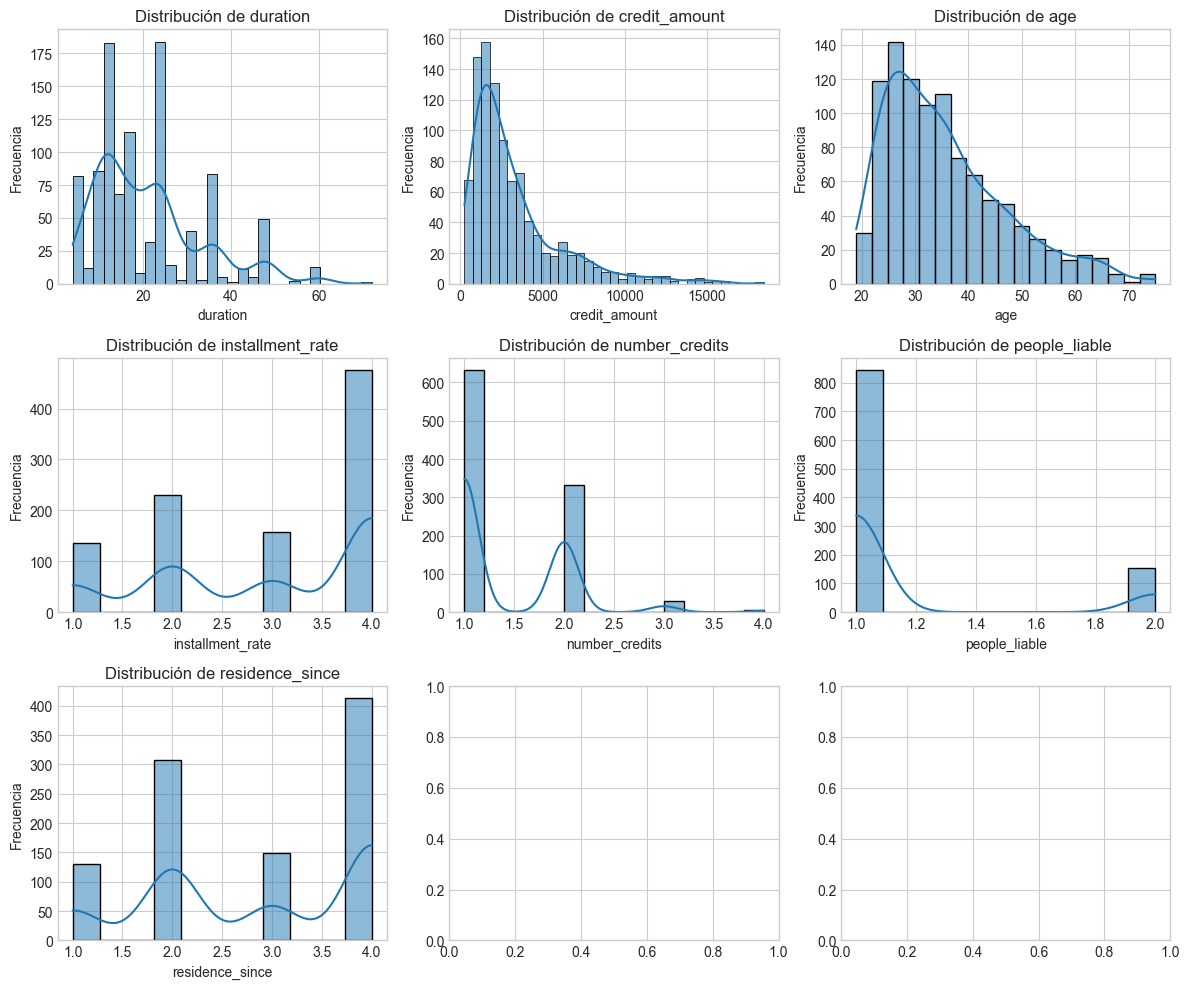

In [6]:
from tp_final_fairness_ML.utils.plotting import visualizar_distribuciones

variables_numericas = ['duration', 'credit_amount', 'age', 'installment_rate', 'number_credits', 'people_liable', 'residence_since']
visualizar_distribuciones(g_credit_data, variables_numericas, filas = 3, columnas= 3)

**Observaciones sobre las variables numéricas:**

- **duration**: La duración media del crédito es de aproximadamente 21 meses, con un rango de 4 a 72 meses.
- **credit_amount**: El monto promedio de crédito es de 3,271 DM, con una variabilidad considerable (desviación estándar de 2,823 DM).
- **age**: La edad promedio de los solicitantes es de 35.5 años, con un mínimo de 19 y un máximo de 75 años.
- **installment_rate**: La tasa de pago promedio es de aproximadamente 3 (en porcentaje del ingreso disponible).
- **target**: La variable objetivo tiene un valor medio de 1.3, lo que indica que aproximadamente el 30% de los préstamos están clasificados como de alto riesgo (valor 2).

### 2.2 Relación con la variable objetivo

Exploramos cómo las variables numéricas se relacionan con la clasificación de riesgo crediticio.

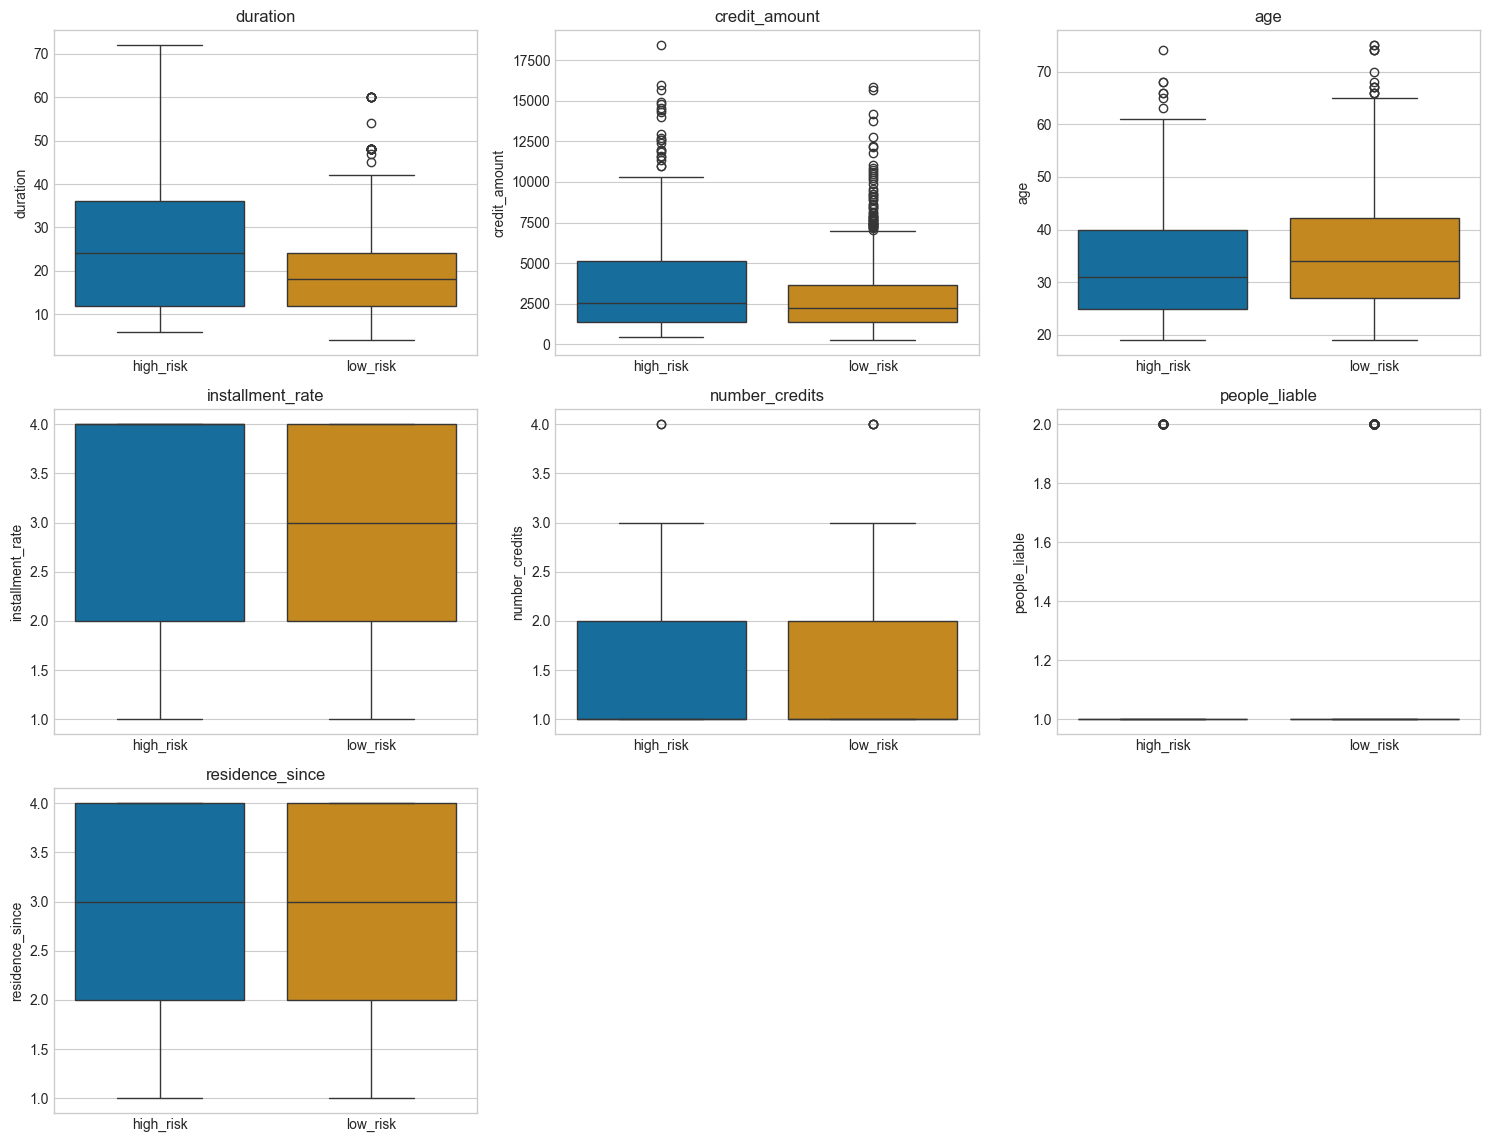

In [7]:
from tp_final_fairness_ML.utils.plotting import graficar_columnas

graficar_columnas(g_credit_data, variables_numericas, 'target_label', 'boxplot')

**Análisis de la relación entre variables numéricas y riesgo crediticio:**

- **duration**: Los préstamos clasificados como de alto riesgo tienden a tener una duración mayor. Esto podría indicar que préstamos a más largo plazo se asocian con mayor probabilidad de incumplimiento.
- **credit_amount**: Los préstamos de alto riesgo suelen tener montos ligeramente más altos, aunque la diferencia no es tan marcada como en otras variables.
- **age**: Los solicitantes más jóvenes parecen ser clasificados como de alto riesgo con mayor frecuencia.
- **installment_rate**: Las tasas de pago más altas se asocian moderadamente con clasificaciones de alto riesgo.
- **residence_since**: No se observa una diferencia significativa entre las categorías de riesgo en función del tiempo de residencia.

## 3. Análisis de variables categóricas

Analizamos ahora las variables categóricas para entender su distribución y relación con la variable objetivo.

### 3.1 Distribuciones y estadísticas

In [8]:
g_credit_data.describe(include='category')

,checking_account,credit_history,purpose,savings_account,employment_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker,genre,target_label
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2,2
top,no account,paid duly till now,radio/TV,< 100 DM,1 <= ... < 4 years,"male, single",none,car / other,none,own,skilled / official,none,yes,male,low_risk
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,690,700


**Observaciones sobre las variables categóricas:**

* **credit_history**: Al momento de solicitar un préstamo, un solicitante suele tener todos sus préstamos pagados debidamente.
* **personal_status_sex**: Los solicitantes son mayormente hombres solteros.
* **housing**: Los solicitantes en gran mayoría son dueños de la casa que habitan.
* **job**: Los solicitantes en gran mayoría tienen trabajos estables.
* **foreign_worker**: La mayoría son trabajadores extranjeros.

### 3.2 Relación con la variable objetivo

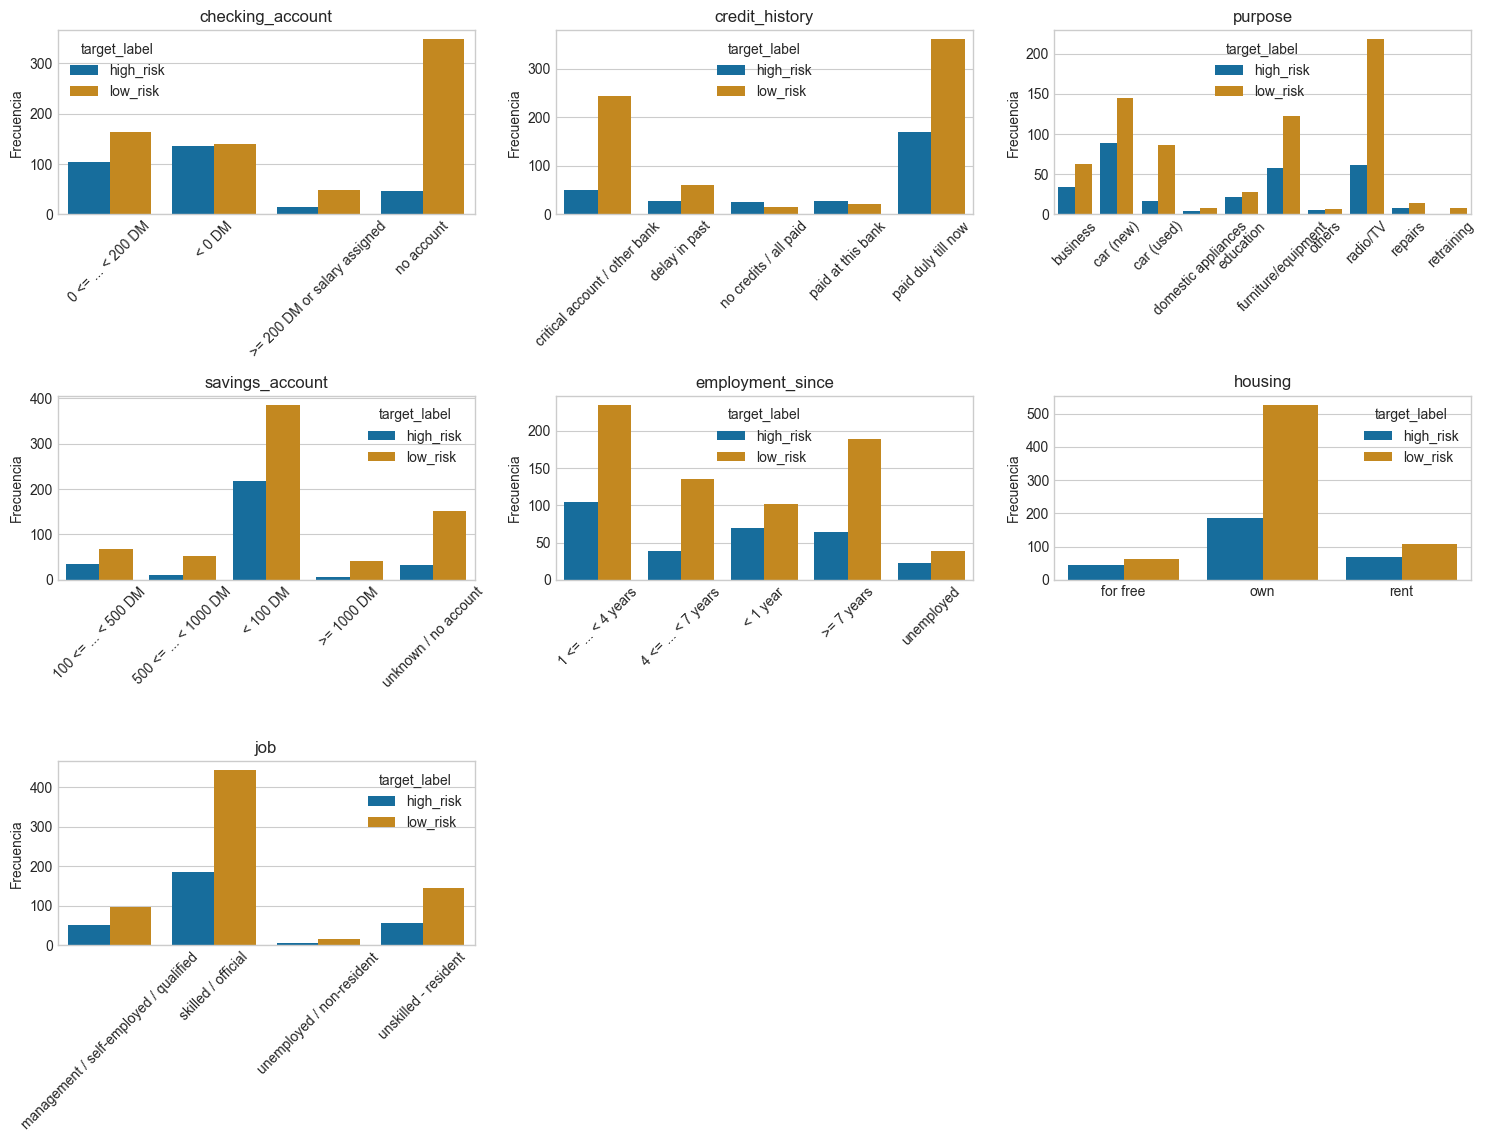

In [9]:
cat_cols = ['checking_account', 'credit_history', 'purpose', 'savings_account',
            'employment_since', 'housing', 'job']

graficar_columnas(g_credit_data, cat_cols, 'target_label', 'countplot')

**Análisis de la relación entre variables categóricas y riesgo crediticio:**

* **checking_account**: Los solicitantes de bajo riesgo suelen no tener cuenta o tener saldos altos. Los de alto riesgo se concentran con saldos bajos.

* **savings_account**: En solicitantes con ahorros más bajos (<100 DM) suelen aparecer más de alto riesgo.

* **employment_since**: Mayor antigüedad laboral (≥ 4 años) se asocia a buen historial. Los que llevan menos de 1 año o están desempleados tienden a ser de alto riesgo.

* **housing**: La mayoría de los solicitantes de bajo riesgo son propietarios. Alquilar o vivir gratis es más común entre aquellos solicitantes clasificados como de alto riesgo si hablamos en términos de proporciones.

Con todos estos puntos en mente ya tenemos un análisis realizado sobre las variables presentes en nuestro conjunto de datos, logrando identificar aquellas más relevantes para la variable objetivo y aquellas que no tanto.

Ahora como último paso en este análisis exploratorio analizaremos más a fondo la variable que registra información sobre el género del solicitante.

## 4. Análisis de equidad por género

En esta sección, examinamos específicamente la distribución de género en los datos y su relación con la clasificación de riesgo crediticio, lo cual es fundamental para evaluar la equidad del modelo.

### 4.1 Distribución por género

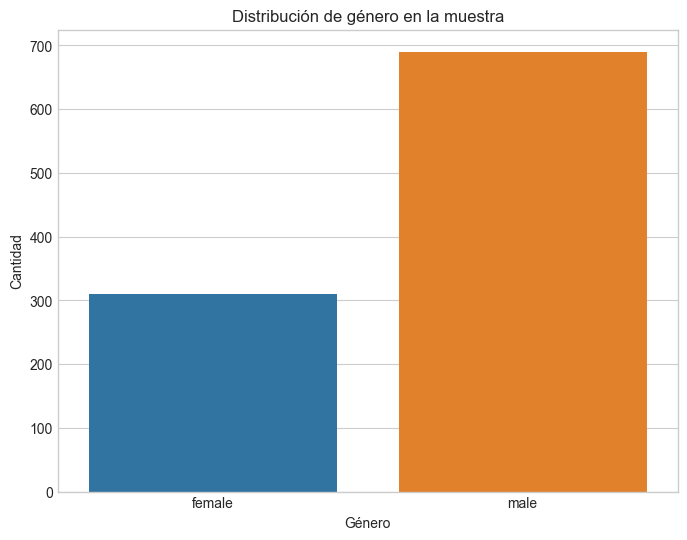

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=g_credit_data, x='genre', hue='genre')
plt.title("Distribución de género en la muestra")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.show()

**Observaciones sobre la distribución de género:**

* Tenemos **una clara mayoría** del género masculino siendo en total 700 solicitantes de este género ante 300 del género femenino.

### 4.2 Tasas de aprobación por género

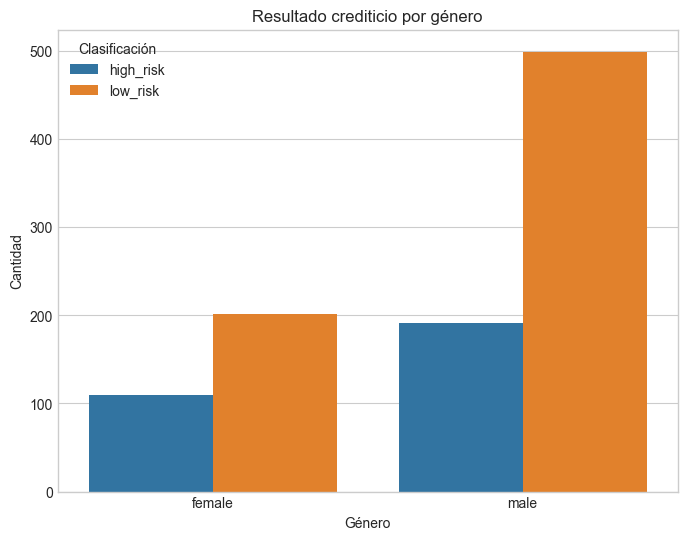

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=g_credit_data, x='genre', hue='target_label')
plt.title("Resultado crediticio por género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.legend(title="Clasificación")
plt.show()

**Análisis de la relación género-riesgo:**

Podemos ver que en el género femenino la diferencia de proporciones entre el bajo o alto riesgo crediticio no está tan marcada como en el género masculino, donde la mayoría son clasificados como de bajo riesgo. Esto sugiere que en términos de proporciones, a las solicitantes femeninas se les suele clasificar como de alto riesgo con mayor frecuencia.

Veamos esto de las proporciones con un gráfico más específico:

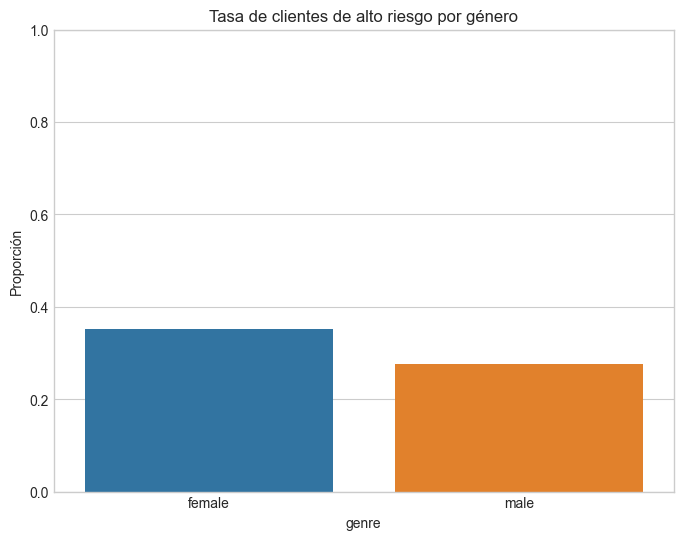

In [12]:
# Calculamos la tasa de alto riesgo por género
tasa_genero = g_credit_data.groupby('genre', observed= True)['target'].apply(lambda x: (x == 2).mean()).reset_index()
tasa_genero.columns = ['genre', 'tasa']

plt.figure(figsize=(8, 6))
sns.barplot(data=tasa_genero, x='genre', y='tasa', hue='genre')
plt.title("Tasa de clientes de alto riesgo por género")
plt.ylabel("Proporción")
plt.ylim(0, 1)
plt.show()

In [13]:
tasa_genero

,genre,tasa
0,female,0.351613
1,male,0.276812


**Hallazgos importantes sobre equidad de género:**

A partir del gráfico y tabla anteriores, podemos ver que los solicitantes clasificados como de alto riesgo son en mayor proporción femeninos (como ya habíamos notado en los gráficos anteriores). Más precisamente, la diferencia es de aproximadamente 8 puntos porcentuales entre géneros:

- **Mujeres**: 35.2% clasificadas como alto riesgo
- **Hombres**: 27.7% clasificados como alto riesgo

Esta disparidad es significativa y plantea interrogantes importantes sobre equidad:
- ¿Existe un sesgo preestablecido entre las personas que generaron la clasificación originalmente?
- ¿Podremos evitar este posible sesgo en nuestro modelo predictivo?

## 5. Resumen y conclusiones

Del análisis exploratorio realizado, podemos extraer las siguientes conclusiones clave:

1. **Variables numéricas relevantes:**
   - La duración del crédito muestra una clara relación con el riesgo: préstamos a más largo plazo tienden a ser clasificados como de mayor riesgo.
   - Solicitantes más jóvenes tienen mayor probabilidad de ser clasificados como de alto riesgo.
   - Montos de crédito más altos también se asocian moderadamente con clasificaciones de mayor riesgo.

2. **Variables categóricas importantes:**
   - El estado de la cuenta corriente es un fuerte predictor: saldos bajos se asocian con alto riesgo.
   - Ahorros bajos (<100 DM) se asocian con clasificaciones de alto riesgo.
   - Menor antigüedad laboral (menos de 1 año) está relacionada con clasificaciones de alto riesgo.
   - Propietarios de vivienda tienen menor probabilidad de ser clasificados como de alto riesgo.

3. **Consideraciones de equidad:**
   - Existe una disparidad notable en las tasas de clasificación de alto riesgo entre géneros (35.2% para mujeres vs 27.7% para hombres).
   - Esta diferencia de 8 puntos porcentuales plantea preocupaciones sobre posibles sesgos en la clasificación original.
   - Las variables relacionadas con ingresos, empleo y propiedad podrían estar actuando como proxies que amplifican disparidades de género.

# Entrenando un primer modelo

## Índice de Contenido

1. [Preparación del entorno y carga de datos](#1.-Preparación-del-entorno-y-carga-de-datos)
2. [Preparación de datos para el entrenamiento](#2.-Preparación-de-datos-para-el-entrenamiento)
    - [One-Hot Encoding y análisis de correlación respecto a variable objetivo](#2.1-One-hot-encoding-y-análisis-de-correlación-respecto-a-variable-objetivo)
    - [Estandarización y separación en datos de entrenamiento y prueba](#2.2-Estandarización-y-separación-en-datos-de-entrenamiento-y-prueba)
3. [Entrenamiento del modelo de regresión logística](#3.-Entrenamiento-del-modelo-de-regresión-logística)
4. [Evaluación del modelo mediante métricas de clasificación](#4.-Evaluación-del-modelo-mediante-métricas-de-clasificación)
5. [Análisis de la matriz de confusión](#5.-Análisis-de-la-matriz-de-confusión)
6. [Preparación y guardado de datos para análisis de equidad y posterior mitigación](#6.-Preparación-y-guardado-de-datos-para-análisis-de-equidad-y-posterior-mitigación)
7. [Resumen y conclusiones](#7.-Resumen-y-conclusiones)

## 1. Preparación del entorno y carga de datos

In [28]:
import pandas as pd
from tp_final_fairness_ML.utils.preprocessing import convertir_object_a_categ
import os 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from tp_final_fairness_ML.utils.plotting import graficar_matriz_de_confusion

# Carga de datos
ruta_archivo = os.path.join('..', 'data', 'processed', 'german_credit_data.csv')
g_credit_data = pd.read_csv(ruta_archivo)

# Conversión de columnas tipo objeto a categóricas para mejor manejo
g_credit_data = convertir_object_a_categ(g_credit_data)

In [29]:
# Vista general de los datos
print(f"Dimensiones del dataset: {g_credit_data.shape[0]} filas × {g_credit_data.shape[1]} columnas\n")
print("Primeras 5 filas:")
g_credit_data.head()

Dimensiones del dataset: 1000 filas × 23 columnas

Primeras 5 filas:


,checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,other_debtors,...,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,target,genre,target_label
0,< 0 DM,6,critical account / other bank,radio/TV,1169,unknown / no account,>= 7 years,4,"male, single",none,...,none,own,2,skilled / official,1,"yes, registered",yes,1,male,low_risk
1,0 <= ... < 200 DM,48,paid duly till now,radio/TV,5951,< 100 DM,1 <= ... < 4 years,2,"female, div/sep/married",none,...,none,own,1,skilled / official,1,none,yes,2,female,high_risk
2,no account,12,critical account / other bank,education,2096,< 100 DM,4 <= ... < 7 years,2,"male, single",none,...,none,own,1,unskilled - resident,2,none,yes,1,male,low_risk
3,< 0 DM,42,paid duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,"male, single",guarantor,...,none,for free,1,skilled / official,2,none,yes,1,male,low_risk
4,< 0 DM,24,delay in past,car (new),4870,< 100 DM,1 <= ... < 4 years,3,"male, single",none,...,none,for free,2,skilled / official,2,none,yes,2,male,high_risk


In [30]:
# Información general sobre el dataset
g_credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   checking_account         1000 non-null   category
 1   duration                 1000 non-null   int64   
 2   credit_history           1000 non-null   category
 3   purpose                  1000 non-null   category
 4   credit_amount            1000 non-null   int64   
 5   savings_account          1000 non-null   category
 6   employment_since         1000 non-null   category
 7   installment_rate         1000 non-null   int64   
 8   personal_status_sex      1000 non-null   category
 9   other_debtors            1000 non-null   category
 10  residence_since          1000 non-null   int64   
 11  property                 1000 non-null   category
 12  age                      1000 non-null   int64   
 13  other_installment_plans  1000 non-null   category
 14  housing  

## 2. Preparación de datos para el entrenamiento

Llegamos a la prte de la preparación de datos para el entrenamiento de nuestro primer modelo. Entre los objetivos principales a lograr en esta sección tenemos:

* Llevar nuestros datos categóricos a un formato numérico mediante técnicas de encoding para poder usarlas en nuestro modelo.

* Realizar una **selección de variables** predictoras mediante el análisis de correlación respecto a la variable objetivo

* Sobre las variables seleccionadas **hacer una estandarización** de cara al entrenamiento del modelo.

* Separar los datos en conjuntos de entrenamiento y prueba.

### 2.1 One-Hot Encoding y análisis de correlación respecto a variable objetivo

Primero, aplicaremos **One-Hot Encoding** a nuestro conjunto de datos para convertir todas las variables categóricas en un formato completamente numérico. Sin embargo, antes de hacerlo, eliminaremos un par de columnas cuya inclusión en este proceso resultaría **redundante**: **target_label** y **personal_status_sex**. A continuación, explicamos las razones para su exclusión:

* **personal_status_sex** contiene información combinada sobre el género y el estado civil de los solicitantes. Durante el análisis exploratorio, ya resumimos esta información en una nueva columna llamada **genre**, que indica únicamente si el solicitante es hombre o mujer. Consideramos que el estado civil no es relevante para los objetivos de este proyecto, por lo que **genre** contiene toda la información pertinente. Mantener **personal_status_sex** sería, por lo tanto, redundante.

* **target_label** fue una columna auxiliar creada durante el análisis exploratorio para facilitar la interpretación de las clases objetivo. Sin embargo, su información ya está representada en la columna **target**, por lo que no es necesario conservarla ni transformarla.

Por último, es importante aclarar una modificación que realizaremos en la columna **target**, la cual actualmente codifica el riesgo crediticio como **1 para bajo riesgo** y **2 para alto riesgo**. Para simplificar el modelado y facilitar la interpretación de los resultados, convertiremos estos valores a **1 para bajo riesgo crediticio** y **0 para alto riesgo crediticio**, siguiendo la convención habitual en problemas de clasificación binaria. Con todo esto aclarado procedemos a realizar los cambios:

In [31]:
# Eliminación de columnas innecesarias
g_credit_data = g_credit_data.drop(columns=['target_label', 'personal_status_sex'])

# Cambio de valores en columna 'target'
g_credit_data['target'] = g_credit_data['target'].map({1: 1, 2: 0})

# One-Hot Encoding de variables categóricas
g_credit_data_dummies = pd.get_dummies(g_credit_data)
g_credit_data_dummies = g_credit_data_dummies.astype(int)

print(f"Dimensiones del dataset: {g_credit_data_dummies.shape[0]} filas × {g_credit_data_dummies.shape[1]} columnas\n")
print("Primeras 5 filas:")
display(g_credit_data_dummies.head())

Dimensiones del dataset: 1000 filas × 60 columnas

Primeras 5 filas:


,duration,credit_amount,installment_rate,residence_since,age,number_credits,people_liable,target,checking_account_0 <= ... < 200 DM,checking_account_< 0 DM,...,job_management / self-employed / qualified,job_skilled / official,job_unemployed / non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered",foreign_worker_no,foreign_worker_yes,genre_female,genre_male
0,6,1169,4,4,67,2,1,1,0,1,...,0,1,0,0,0,1,0,1,0,1
1,48,5951,2,2,22,1,1,0,1,0,...,0,1,0,0,1,0,0,1,1,0
2,12,2096,2,3,49,1,2,1,0,0,...,0,0,0,1,1,0,0,1,0,1
3,42,7882,2,4,45,1,2,1,0,1,...,0,1,0,0,1,0,0,1,0,1
4,24,4870,3,4,53,2,2,0,0,1,...,0,1,0,0,1,0,0,1,0,1


Ya con nuestros datos en un formato numérico podemos proceder con el **análisis de correlación** que nos ayudará a elegir variables predictoras para nuestro modelo. Procedemos a observar las correlaciones respecto a la variable objetivo:

In [32]:
correlaciones = g_credit_data_dummies.corr()['target'].sort_values(ascending=False)
print("Correlaciones con la variable 'target':")
print(correlaciones)

Correlaciones con la variable 'target':
target                                           1.000000
checking_account_no account                      0.322436
credit_history_critical account / other bank     0.181713
housing_own                                      0.134589
savings_account_unknown / no account             0.129238
property_real estate                             0.119300
other_installment_plans_none                     0.113285
purpose_radio/TV                                 0.106922
purpose_car (used)                               0.099791
age                                              0.091127
savings_account_>= 1000 DM                       0.085749
foreign_worker_no                                0.082079
employment_since_4 <= ... < 7 years              0.075980
genre_male                                       0.075493
savings_account_500 <= ... < 1000 DM             0.070954
employment_since_>= 7 years                      0.059733
other_debtors_guarantor         

Podemos ver en valores numéricos concretos cosas que **habíamos notado antes en el análisis exploratorio**: 

* La duración de un préstamo tiene una correlación negativa respecto a la variable objetivo, es decir que los solicitantes de alto riesgo solicitan préstamos de mayor duración.

* La presencia o ausencia de cuentas de ahorro/corriente tienen fuerte correlación en ambos sentidos con respecto a la variable objetivo.

Y así muchas otras relaciones observadas anteriormente en el análisis exploratorio podemos observar que aquí se cumplen.

Ahora con el objetivo de reducir el ruido y construir un modelo base más simple pero efectivo, aplicaremos un criterio básico de **selección de variables basado en la correlación** con la variable objetivo. En concreto, seleccionaremos aquellas variables que presenten una **correlación en valor absoluto mayor a 0.1** respecto de la variable **target**.

Este umbral fue elegido de manera pragmática: aunque no es alto, permite filtrar aquellas variables que tienen una **relación débil o inexistente con la variable objetivo**, sin ser demasiado restrictivo. De esta forma, eliminamos variables irrelevantes que podrían introducir ruido o redundancia en el modelo, al tiempo que conservamos aquellas que muestran al menos un **grado mínimo de asociación lineal** con el resultado que se desea predecir.
Procedemos a realizar dicha selección:

In [33]:
# Selección de variables con correlación significativa
variables_seleccionadas = correlaciones[abs(correlaciones) > 0.1].index.tolist()
variables_seleccionadas.append('genre_male')
variables_seleccionadas.remove('target')
                               
# Df para mostrar las variables seleccionadas junto con su correlacion
df_seleccionadas = pd.DataFrame(correlaciones[variables_seleccionadas])
df_seleccionadas = df_seleccionadas.reset_index()
df_seleccionadas.columns = ['variable', 'correlacion']
df_seleccionadas = df_seleccionadas.sort_values(by='correlacion', ascending=False)
print("Variables seleccionadas y su correlación con la variable 'target':")
df_seleccionadas

Variables seleccionadas y su correlación con la variable 'target':


,variable,correlacion
0,checking_account_no account,0.322436
1,credit_history_critical account / other bank,0.181713
2,housing_own,0.134589
3,savings_account_unknown / no account,0.129238
4,property_real estate,0.119300
5,other_installment_plans_none,0.113285
6,purpose_radio/TV,0.106922
16,genre_male,0.075493
7,employment_since_< 1 year,-0.106397
8,checking_account_0 <= ... < 200 DM,-0.119581


Como último comentario queríamos mencionar el hecho de que incluimos a la variable que registra el género entre las seleccionadas, por más que esta no tuviese una alta correlación entendemos que esta es la pieza central en el desarrollo del modelo. 

### 2.2 Estandarización y separación en datos de entrenamiento y prueba

Prepararemos los datos para el entrenamiento de nuestro modelo.Esto implica:

1. Separar variables predictoras (X) de la variable objetivo (y)
2. Dividir los datos en conjuntos de entrenamiento y prueba
3. Estandarizar las variables predictoras (X) de entrenamiento y prueba

In [34]:
# Separamos variables predictoras (X) y variable objetivo (y)
X = g_credit_data_dummies[variables_seleccionadas]
y = g_credit_data_dummies['target']
indices = X.index

# Dividimos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X.values, y.values, indices, test_size=0.2, random_state=42
)

# Estandarizamos las variables predictoras 
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mostramos las dimensiones de los conjuntos de entrenamiento y prueba
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Distribución de clases en el conjunto de entrenamiento: {np.bincount(y_train)}")
print(f"Distribución de clases en el conjunto de prueba: {np.bincount(y_test)}")

Dimensiones de X_train: (800, 17)
Dimensiones de X_test: (200, 17)
Distribución de clases en el conjunto de entrenamiento: [241 559]
Distribución de clases en el conjunto de prueba: [ 59 141]


## 3. Entrenamiento del modelo de regresión logística

Utilizaremos un modelo de regresión logística como nuestro modelo base debido a:

1. **Simplicidad e interpretabilidad**: La regresión logística es un modelo sencillo
   cuyos coeficientes pueden interpretarse directamente, facilitando el análisis de equidad.

2. **Adecuación al problema**: Al ser un problema de clasificación binaria (alto/bajo riesgo),
   la regresión logística es una opción natural y efectiva.

3. **Eficiencia computacional**: Requiere menos recursos y tiempo de entrenamiento
   que modelos más complejos, lo que es ideal para una primera iteración.

Procedemos al entrenamiento de este modelo:

In [35]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(random_state=42, max_iter=1000, fit_intercept= True)
modelo.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba
y_pred_test = modelo.predict(X_test_scaled)

## 4. Evaluación del modelo mediante métricas de clasificación

Evaluaremos el desempeño del modelo utilizando métricas estándar de clasificación:

- **Precisión (Precision)**: Proporción de predicciones positivas que fueron correctas
- **Sensibilidad (Recall)**: Proporción de casos positivos reales que fueron correctamente identificados
- **F1-Score**: Media armónica de precisión y sensibilidad
- **Exactitud (Accuracy)**: Proporción total de predicciones correctas

Estas métricas nos darán una visión general de la calidad del modelo y su capacidad
para identificar correctamente tanto solicitantes de bajo como de alto riesgo.

In [36]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_test))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.66      0.42      0.52        59
           1       0.79      0.91      0.84       141

    accuracy                           0.77       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.75      0.77      0.75       200



### Interpretación de las métricas

- **Clase 1 (Bajo riesgo)**: El modelo muestra un buen desempeño identificando solicitantes de bajo riesgo:
  - Precisión: 0.79 - El 79% de los solicitantes clasificados como bajo riesgo efectivamente lo son.
  - Sensibilidad: 0.91 - El modelo identifica correctamente el 91% de los solicitantes de bajo riesgo.
  - F1-Score: 0.84 - Buen balance entre precisión y sensibilidad para esta clase.

- **Clase 0 (Alto riesgo)**: El desempeño es menor para identificar solicitantes de alto riesgo:
  - Precisión: 0.66 - El 66% de los solicitantes clasificados como alto riesgo realmente lo son.
  - Sensibilidad: 0.42 - El modelo solo identifica correctamente el 42% de los solicitantes de alto riesgo.
  - F1-Score: 0.52 - Desempeño bajo/moderado para esta clase.

- **Exactitud general**: 0.77 - El 77% de todas las predicciones son correctas.

Este desequilibrio en el desempeño entre clases podría atribuirse principalmente a la
distribución desbalanceada de las clases en los datos, donde hay más solicitantes de
bajo riesgo que de alto riesgo. Esta situación es común en problemas de crédito y
requiere atención especial desde la perspectiva de equidad.

## 5. Análisis de la matriz de confusión

La matriz de confusión nos permitirá visualizar en detalle los aciertos y errores del modelo,
así como entender los diferentes tipos de errores (falsos positivos y falsos negativos) y su
impacto en términos de equidad y toma de decisiones.

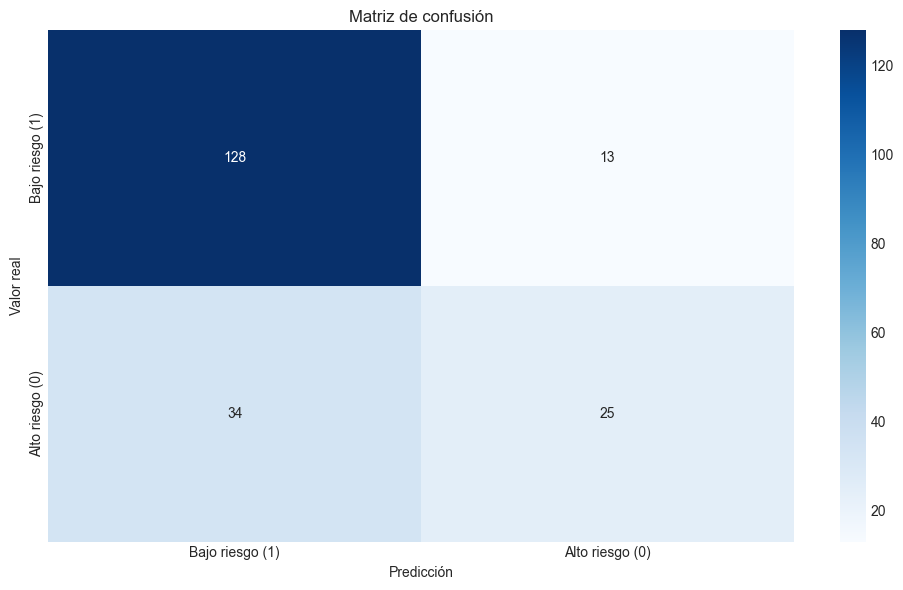

In [37]:
graficar_matriz_de_confusion(y_test, y_pred_test)

### Interpretación de la matriz de confusión

Para interpretar correctamente la matriz, consideremos:

- **Verdaderos positivos (TP)**: 128 solicitantes fueron correctamente clasificados como de bajo riesgo.
- **Falsos negativos (FN)**: 13 solicitantes de bajo riesgo fueron incorrectamente clasificados como de alto riesgo.
- **Falsos positivos (FP)**: 34 solicitantes de alto riesgo fueron incorrectamente clasificados como de bajo riesgo.
- **Verdaderos negativos (TN)**: 25 solicitantes fueron correctamente clasificados como de alto riesgo.

**Implicaciones de los errores**:

1. **Falsos positivos (34)**: Este tipo de error es particularmente problemático para instituciones financieras, ya que implica otorgar préstamos a personas que realmente son de alto riesgo, lo que podría resultar en pérdidas financieras.

2. **Falsos negativos (13)**: Aunque menos costoso desde la perspectiva financiera, este error implica negar préstamos a personas que realmente son de bajo riesgo, lo que representa un problema de equidad y acceso a servicios financieros.

El balance entre estos tipos de errores es fundamental para garantizar tanto la salud financiera de la institución como la equidad en el acceso al crédito para diferentes grupos demográficos.

## 6. Preparación y guardado de datos para análisis de equidad y posterior mitigación

Para realizar un análisis de equidad por género, necesitamos combinar nuestras predicciones
con la información de género de los solicitantes. Esto nos permitirá evaluar si el modelo
presenta sesgos algorítmicos que afecten desproporcionadamente a algún grupo.

Crearemos un nuevo conjunto de datos que contenga:
- Las etiquetas reales **y_test**
- Las predicciones del modelo **y_pred_test**
- El género de cada solicitante

In [38]:
ruta_datos_procesados = os.path.join('..', 'data', 'processed', 'german_credit_data.csv')
g_credit_data = pd.read_csv(ruta_datos_procesados)

df_genero_eval = pd.DataFrame({
    'y_test': y_test,
    'y_pred_test': y_pred_test,
    'genre': g_credit_data.loc[idx_test, 'genre']
})

print("Primeras filas del dataframe para análisis de equidad:")
display(df_genero_eval.head())

ruta_guardado = os.path.join('..', 'data', 'processed', 'df_genero_eval.csv')
df_genero_eval.to_csv(ruta_guardado, index=False)
print(f"Datos guardados en: {ruta_guardado}")

Primeras filas del dataframe para análisis de equidad:


,y_test,y_pred_test,genre
521,0,1,female
737,1,1,male
740,1,0,male
660,1,1,male
411,1,1,male


Datos guardados en: ..\data\processed\df_genero_eval.csv


También guardaremos los conjuntos de datos de entrenamiento y de prueba, esto con el propósito de usarlos en la posterior 
aplicación de técnicas de mitigación sobre el modelo base:

In [39]:
# Convertimos los conjuntos de entrenamiento y prueba a DataFrames para guardarlos
X_train_df = pd.DataFrame(X_train, columns=variables_seleccionadas)
X_test_df = pd.DataFrame(X_test, columns=variables_seleccionadas)
y_train_df = pd.DataFrame(y_train, columns=['target'])
y_test_df = pd.DataFrame(y_test, columns=['target'])

# Definimos las rutas para guardar los conjuntos de entrenamiento y prueba
ruta_X_train = os.path.join('..', 'data', 'processed', 'X_train.csv')
ruta_X_test = os.path.join('..', 'data', 'processed', 'X_test.csv')
ruta_y_train = os.path.join('..', 'data', 'processed', 'y_train.csv')
ruta_y_test = os.path.join('..', 'data', 'processed', 'y_test.csv')

# Guardamos los conjuntos de entrenamiento y prueba en archivos CSV
X_train_df.to_csv(ruta_X_train, index=False)
X_test_df.to_csv(ruta_X_test, index=False)
y_train_df.to_csv(ruta_y_train, index=False)
y_test_df.to_csv(ruta_y_test, index=False)

print(f"Conjuntos de entrenamiento y prueba guardados en:")
print(f" - {ruta_X_train}")
print(f" - {ruta_X_test}")
print(f" - {ruta_y_train}")
print(f" - {ruta_y_test}")

Conjuntos de entrenamiento y prueba guardados en:
 - ..\data\processed\X_train.csv
 - ..\data\processed\X_test.csv
 - ..\data\processed\y_train.csv
 - ..\data\processed\y_test.csv


## 7. Resumen y conclusiones

En este notebook hemos completado las siguientes tareas:

1. **Carga y preparación de datos**: Importamos el conjunto de datos German Credit y aplicamos un One hot encoding para poder entrenar un modelo usando también a las variables categóricas.

2. **Selección de features**: Una vez hecho el One-Hot Encoding elegimos las columnas que mostraron mayor correlación con la variable objetivo, eliminando así gran parte del ruido.

3. **Entrenamiento del modelo**: Implementamos un modelo de regresión logística para predecir el riesgo crediticio de un solicitante.

4. **Evaluación de desempeño**: Analizamos las métricas de clasificación y la matriz de confusión para entender el comportamiento del modelo.

5. **Preparación y guardado de datos para análisis de equidad y posterior mitigación**: Generamos un conjunto de datos que incluye las predicciones y el género de los solicitantes, además guardamos los conjuntos de datos de entrenamiento y prueba para usarlo en posteriores modelos mitigados que desarrollemos.

Observamos que el modelo tiene un buen desempeño general (77% de exactitud), pero muestra diferencias significativas en su capacidad para identificar correctamente las dos clases: es mejor identificando solicitantes de bajo riesgo (91% de sensibilidad) que solicitantes de alto riesgo (42% de sensibilidad).

# Evaluación de equidad por género

## Índice de Contenido

1. [Preparación del entorno y carga de datos](#1.-Preparación-del-entorno-y-carga-de-datos)
2. [Mirando matriz de confusión y métricas varias](#2.-Mirando-matriz-de-confusión-y-métricas-varias)
3. [Evaluando según distintos enfoques del Group Fairness](#3.-Evaluando-según-distintos-enfoques-del-group-fairness)
    - [Definición de métricas del Group Fairness](#3.1-Definición-de-métricas-del-group-fairness)
    - [Evaluación de disparidad](#3.2-Evaluación-de-disparidad)
4. [Resumen y conclusiones](#4.-Resumen-y-conclusiones)

## 1. Preparación del entorno y carga de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

ruta_archivo = os.path.join('..', 'data', 'processed', 'df_genero_eval.csv')

df_genero_eval = pd.read_csv(ruta_archivo)

In [2]:
# Vista general de los datos
print(f"Dimensiones del dataset: {df_genero_eval.shape[0]} filas × {df_genero_eval.shape[1]} columnas\n")
print("Primeras 5 filas:")
df_genero_eval.head()

Dimensiones del dataset: 200 filas × 3 columnas

Primeras 5 filas:


,y_test,y_pred_test,genre
0,0,1,female
1,1,1,male
2,1,0,male
3,1,1,male
4,1,1,male


In [3]:
# Información general sobre el dataset
df_genero_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   y_test       200 non-null    int64 
 1   y_pred_test  200 non-null    int64 
 2   genre        200 non-null    object
dtypes: int64(2), object(1)
memory usage: 4.8+ KB


## 2. Mirando matriz de confusión y métricas varias

Ahora vamos a analizar al atributo que consideramos sensible en este análisis, el género. Para esto vamos a separar el conjunto de datos entre la categoría femenina y masculina:

In [4]:
df_male_eval = df_genero_eval[df_genero_eval['genre'] == 'male']
df_female_eval = df_genero_eval[df_genero_eval['genre']  == 'female']

Con los grupos separados lo siguiente es armar una matriz de confusión para cada uno, así podremos tener insights más precisos sobre el comportamiento del modelo con ambos grupos:

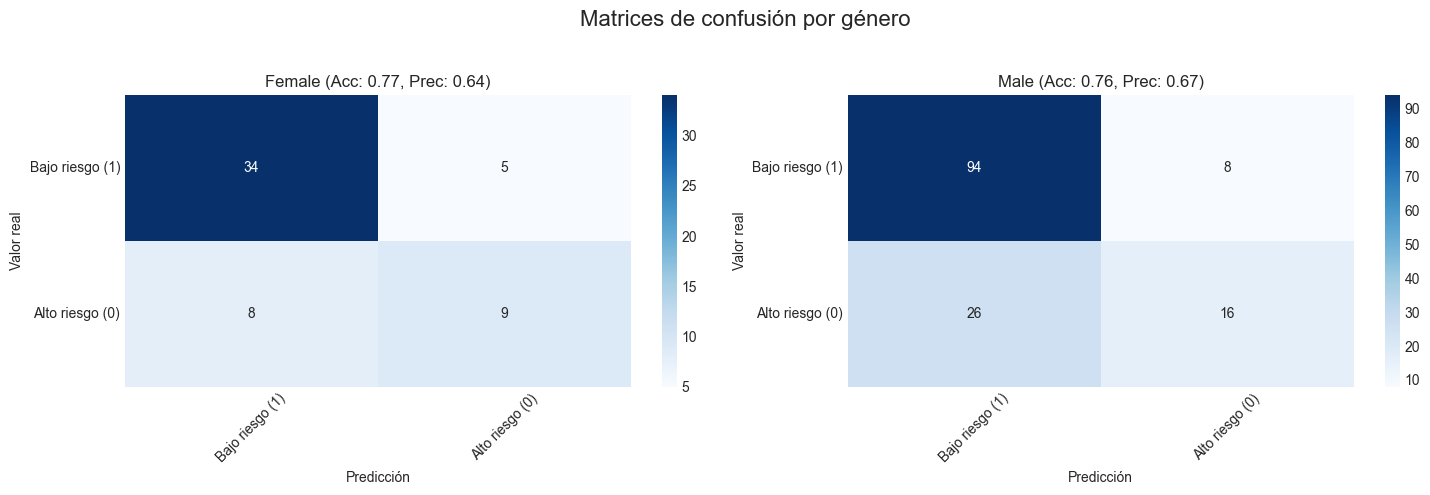

In [5]:
from tp_final_fairness_ML.utils.plotting import graficar_matriz_de_confusion_por_genero

graficar_matriz_de_confusion_por_genero([df_female_eval, df_male_eval], ['Bajo riesgo (1)', 'Alto riesgo (0)'], 'genre', 'y_test', 'y_pred_test')

De este par de gráficos podemos notar lo siguiente:

* En ambas categorías el modelo logró identificar en la mayoría de los casos a los verdaderos positivos con 34 casos en la categoría femenina y 94 en la masculina.

* En la categoría masculina se obtuvo una mayor tasa de falsos positivos en términos de proporción a comparación de la categoría femenina, siendo que de un total de 42 casos de alto riesgo, 26 fueron falsos positivos y 16 verdaderos negativos.

* En la categoría femenina solamente se identificaron a 5 personas erróneamente como de alto riesgo, lo que indica que el modelo tuvo un buen desempeño identificando instancias positivas en esta clase.

Con estos puntos ya empezamos a notar cosas importantes acerca del desempeño del modelo entre los grupos, **pareciendo inicialmente que el modelo se desempeñó mejor en la clase femenina**.

Miremos ahora las métricas generales de clasificación para cada grupo:

In [6]:
from sklearn.metrics import classification_report

print("Mujeres:")
print(classification_report(df_female_eval['y_test'], df_female_eval['y_pred_test']))
print("Hombres:")
print(classification_report(df_male_eval['y_test'], df_male_eval['y_pred_test']))

Mujeres:
              precision    recall  f1-score   support

           0       0.64      0.53      0.58        17
           1       0.81      0.87      0.84        39

    accuracy                           0.77        56
   macro avg       0.73      0.70      0.71        56
weighted avg       0.76      0.77      0.76        56

Hombres:
              precision    recall  f1-score   support

           0       0.67      0.38      0.48        42
           1       0.78      0.92      0.85       102

    accuracy                           0.76       144
   macro avg       0.72      0.65      0.67       144
weighted avg       0.75      0.76      0.74       144



Podemos ver que en términos de métricas calculadas no hay diferencias significativas entre ambos géneros, siendo que en casos como **accuracy general** ambas tuvieron puntajes casi similares e igual ocurre con las otras métricas. **¿Que implica esto en términos de equidad?**.

Para analizar esto aún más a profundidad vamos a hacer **pruebas de disparidad** entre ambos géneros para evaluar si el modelo está generando predicciones justas.

## 3. Evaluando según distintos enfoques del Group Fairness

En el contexto en el que nos encontramos, donde desarrollamos un modelo de aprendizaje automático que ayude en la asignación de créditos bancarios, es fundamental garantizar que las decisiones del sistema no estén sesgadas en función de atributos sensibles como el género. Un enfoque que nos ayudará a evaluar cuestiones relacionadas al sesgo por grupos es el **Group Fairness (equidad grupal)**, el cual permite evaluar si el modelo trata de manera equitativa a distintos grupos poblacionales definidos por atributos sensibles. 

Este enfoque se basa en comparar métricas de desempeño del modelo **—como tasas de verdaderos positivos, falsos positivos, precisión o tasa de aprobación—** entre los distintos grupos. Su relevancia radica en que ayuda a identificar **disparidades sistemáticas que podrían derivar en discriminación algorítmica**, afectando la transparencia, la justicia y, potencialmente, el cumplimiento normativo de la organización.

### 3.1 Definición de métricas del Group Fairness

Entre las principales definiciones de equidad según el enfoque de **Group Fairness**, se identifican **cuatro métricas clave**, que en nuestro caso pueden interpretarse de la siguiente manera:

* **Statistical Parity / Demographic Parity (Independencia): $\mathbb{P}(\hat{Y} = 1 | A =a) = \mathbb{P}(\hat{Y} = 1 | A =b)$:** En nuestro contexto, la clase positiva (1) representa a un solicitante con bajo riesgo crediticio. Este criterio busca que la proporción de personas clasificadas por el modelo como de bajo riesgo sea la misma en ambos grupos (géneros). Esto apunta a garantizar un acceso equitativo a decisiones favorables sin importar el grupo al que se pertenezca.

* **Equalized Odds (Separación): $\mathbb{P}(\hat{Y} = 1 |Y = 1, A =a) = \mathbb{P}(\hat{Y} = 1 |Y = 1, A =b)$ $\text{ y }$ $\mathbb{P}(\hat{Y} = 1 |Y = 0, A =a) = \mathbb{P}(\hat{Y} = 1 |Y = 0, A =b)$:** Este criterio exige que el modelo tenga la misma tasa de verdaderos positivos (clasificar correctamente como de bajo riesgo) y de falsos positivos (clasificar como de bajo riesgo a quienes en realidad no lo son) para ambos grupos. Es decir, que el modelo acierte y se equivoque de forma similar para todos los grupos sensibles.

* **Equal Oportunity (Separación relajada): $\mathbb{P}(\hat{Y} = 1 |Y = 1, A =a) = \mathbb{P}(\hat{Y} = 1 |Y = 1, A =b)$:** Es una versión más flexible de Equalized Odds. Se enfoca únicamente en la tasa de verdaderos positivos, buscando que el modelo identifique con la misma probabilidad como de bajo riesgo a las personas que realmente lo son, sin importar su grupo.

* **Predictive Parity (Suficiencia): $\mathbb{P}(Y= 1 |\hat{Y} =1, A =a) = \mathbb{P}(Y= 1 |\hat{Y} =1, A =b)$** Este criterio se centra en la precisión de las predicciones positivas. En nuestro caso, exige que, entre los solicitantes identificados por el modelo como de bajo riesgo, la proporción que realmente lo son sea igual en ambos grupos. Esto asegura que la confianza que se puede tener en una predicción favorable sea independiente del grupo sensible.

Teniendo en cuenta las definiciones anteriores, ya contamos con una idea clara de qué aspectos debemos medir para evaluar la equidad en cada caso. Para hacerlo, necesitamos recurrir a métricas específicas que se alineen con cada una de estas definiciones. A continuación, detallamos las métricas correspondientes:

* Para **Statistical Parity**, una métrica útil es **`pprev`**, que según la [documentación de Aequitas](https://dssg.github.io/aequitas/metrics.html), libreria dedicada a evaluar fairness, representa la proporción de instancias que el modelo clasifica como positivas (en nuestro caso, solicitantes de bajo riesgo) sobre el total de instancias de un grupo. Esta métrica refleja directamente la probabilidad condicional definida anteriormente.

* En el caso de **Equalized Odds**, las métricas relevantes son el **True Positive Rate (TPR)** y el **False Positive Rate (FPR)**. Para que se cumpla esta definición, ambos indicadores deben superar la prueba de disparidad, es decir, presentar valores similares entre los grupos.

* Para **Equal Opportunity**, nos enfocamos únicamente en el **True Positive Rate (TPR)**. Si esta métrica pasa la prueba de disparidad, se considera que la definición está satisfecha.

* Finalmente, para **Predictive Parity**, la métrica adecuada es la **precisión (precision)**, que mide qué proporción de las instancias clasificadas como positivas por el modelo (bajo riesgo) fueron realmente positivas en la realidad.

Con estas métricas definidas, podemos proceder a aplicar la prueba de disparidad entre los distintos grupos definidos por la variable de género.

### 3.2 Evaluación de disparidad

A continuación, utilizamos las métricas definidas previamente para evaluar la equidad del modelo en función del **género**. Para ello primero obtenemos sus valores puntuales para este caso:

In [7]:
from tp_final_fairness_ML.utils.fairness_eval import calcular_metricas_group_fairness

df_resultado = calcular_metricas_group_fairness(df_genero_eval, 'genre')
display(df_resultado)

,attribute_value,pprev,tpr,fpr,precision
0,female,0.750000,0.871795,0.470588,0.809524
1,male,0.833333,0.921569,0.619048,0.783333


Para evaluar la equidad del modelo en términos de *Group Fairness*, decidimos adoptar como criterio de disparidad una diferencia máxima tolerable de **0.1** (en valor absoluto) entre las métricas de equidad de ambos géneros. Este umbral se fundamenta en tres consideraciones:

* **Interpretabilidad práctica**: diferencias mayores al 10% en métricas como la tasa de verdaderos positivos o la tasa de aprobación pueden implicar efectos sustanciales y sistemáticos sobre el acceso a beneficios (como créditos, becas o servicios), y por lo tanto, pueden considerarse potencialmente injustas o discriminatorias desde una perspectiva de impacto social.

* **Balance entre equidad y performance**: un umbral de 0.1 nos permite mantener un buen compromiso entre reducir el sesgo y no afectar excesivamente la capacidad predictiva del modelo. Umbrales más estrictos podrían forzar al modelo a sacrificar demasiado rendimiento, mientras que valores más permisivos podrían ignorar desigualdades sustanciales.

En este análisis, entonces, **consideramos como aceptable toda diferencia en módulo menor o igual a 0.1**. Si alguna métrica clave supera dicho umbral, interpretamos que hay indicios de sesgo que deben ser luego mitigados. 

In [8]:
# Seleccionamos solo las columnas numéricas (excluyendo 'attribute_value')
columnas_numericas = ['pprev', 'tpr', 'fpr', 'precision']

# Calculamos la diferencia absoluta entre las dos filas
modulo_diferencias = (df_resultado.loc[0, columnas_numericas] - df_resultado.loc[1, columnas_numericas]).abs()

# Mostramos el resultado
print(modulo_diferencias)

pprev        0.083333
tpr          0.049774
fpr          0.148459
precision     0.02619
dtype: object


A partir de las diferencias obtenidas tenemos que:

* **Demographic Parity** (`pprev`: 0.0833): **cumple**
* **Predictive Parity** (`precision`: 0.0261): **cumple**
* **Equalized Odds**:

  * `tpr`: 0.0497 → **cumple** **(Equal Oportunity)**
  * `fpr`: 0.1485 → **no cumple**

Por lo tanto, el modelo **no cumple con Equalized Odds**, ya que comete más errores (falsos positivos) en un grupo que en el otro. Sin embargo nunca está de más destacar el buen desempeño 
general que tuvo nuestro modelo con las 4 métricas consideradas. 

Ahora pensando desde la perspectiva del equipo que forma parte del banco que otorga los créditos, sabemos que nuestro objetivo principal es **maximizar la cantidad de personas que efectivamente van a pagar el préstamo**. Desde esta perspectiva, **Equalized Odds** es la definición de equidad que mejor se alinea con nuestra meta institucional, ya que:

* Controla a los verdaderos positivos, procurando que ambos grupos tengan tasas similares en esta métrica e **identificando correctamente a personas que podrán pagar**.

* Evita otorgar créditos a quienes no podrán pagarlos **ya que toma en cuenta también a los falsos positivos**, protegiendo la sustentabilidad del sistema.

Teniendo esto en cuenta, y dado que observamos una disparidad en la tasa de falsos positivos entre grupos, el próximo paso será desarrollar un modelo que mitigue este sesgo y nos permita cumplir con la definición de **Equalized Odds** en nuestro caso de asignación de créditos.

## 4. Resumen y conclusiones

En este notebook se llevaron a cabo las siguientes etapas:

1. **Carga y exploración de datos**: Se importó el dataset procesado con información de género y predicciones de riesgo crediticio, realizando una revisión inicial de sus dimensiones y características principales.

2. **Análisis de desempeño por género**: Se dividieron los datos en grupos según el género (femenino y masculino) y se evaluó el comportamiento del modelo en cada uno, utilizando matrices de confusión y métricas de clasificación como accuracy, precisión, sensibilidad y tasa de falsos positivos.

3. **Definición y cálculo de métricas de equidad**: Se presentaron los principales enfoques de Group Fairness (Demographic Parity, Equalized Odds, Equal Opportunity y Predictive Parity) y se calcularon las métricas asociadas para cada grupo.

4. **Evaluación de disparidad**: Se compararon las métricas clave entre géneros, estableciendo un umbral de tolerancia 0.1 para considerar aceptable la diferencia. Se identificó que el modelo cumple con la mayoría de los criterios de equidad, excepto en la tasa de falsos positivos (Equalized Odds), donde se observa una disparidad relevante.

5. **Conclusiones y próximos pasos**: Se concluye que, aunque el modelo muestra buen desempeño general, existe un sesgo en la tasa de falsos positivos entre géneros. Se plantea como siguiente objetivo el desarrollo de un modelo mitigado que logre cumplir con Equalized Odds, alineando la equidad con los objetivos institucionales del banco.

En resumen, el análisis permitió identificar fortalezas y áreas de mejora en términos de equidad de género, sentando las bases para futuras acciones de mitigación de sesgo en modelos de riesgo crediticio.

# Mitigación de sesgo en el modelo original

## Índice de Contenido

1. [Preparación del entorno y carga de datos](#1.-Preparación-del-entorno-y-carga-de-datos)
2. [Primer método de mitigación](#2.-Primer-método-de-mitigación)
    - [Aplicación del método y entrenamiento del modelo](#2.1-Aplicación-del-método-y-entrenamiento-del-modelo)
    - [Evaluación del modelo mediante métricas de clasificación](#2.2-Evaluación-del-modelo-mediante-métricas-de-clasificación)
3. [Segundo método de mitigación](#3.-Segundo-método-de-mitigación)
    - [Aplicación del método y entrenamiento del modelo](#3.1-Aplicación-del-método-y-entrenamiento-del-modelo)
    - [Evaluación del modelo mediante métricas de clasificación](#3.2-Evaluación-del-modelo-mediante-métricas-de-clasificación)
4. [Evaluación de equidad de modelos mitigados](#4.-Evaluación-de-equidad-de-modelos-mitigados)
5. [Resumen y conclusiones](#5.-Resumen-y-conclusiones)

# 1. Preparación del entorno y carga de datos

In [141]:
import pandas as pd
import os
from holisticai.bias.metrics import classification_bias_metrics
from sklearn.linear_model import LogisticRegression
from holisticai.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tp_final_fairness_ML.utils.plotting import graficar_matriz_de_confusion

# Carga de datos
ruta_X_train = os.path.join("..", "data", "processed", "X_train.csv")
ruta_X_test = os.path.join("..", "data", "processed", "X_test.csv")
ruta_y_train = os.path.join("..", "data", "processed", "y_train.csv")
ruta_y_test = os.path.join("..", "data", "processed", "y_test.csv")

X_train = pd.read_csv(ruta_X_train, index_col=0)
X_test = pd.read_csv(ruta_X_test, index_col=0)
y_train = pd.read_csv(ruta_y_train).values.ravel()
y_test = pd.read_csv(ruta_y_test).values.ravel()

#### Baseline

In [142]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo = LogisticRegression(random_state=42, max_iter=1000)
modelo.fit(X_train_scaled, y_train)

y_pred_test = modelo.predict(X_test_scaled)

metrics = {}

baseline = classification_bias_metrics(
    X_test["genre_male"] == 1,
    X_test["genre_male"] == 0,
    y_pred_test,
    y_test,
    metric_type="both",
)

baseline_accuracy = accuracy_score(y_test, y_pred_test)

metrics["Baseline"] = baseline
print(baseline)
print(f"Baseline accuracy: {baseline_accuracy:.4f}")
print(classification_report(y_test, y_pred_test))

                                       Value  Reference
Metric                                                 
Statistical Parity                  0.076389          0
Disparate Impact                    1.101852          1
Four Fifths Rule                    0.907563          1
Cohen D                             0.193591          0
2SD Rule                            1.224264          0
Equality of Opportunity Difference  0.049774          0
False Positive Rate Difference      0.124650          0
Average Odds Difference             0.087212          0
Accuracy Difference                 0.002976          0
Baseline accuracy: 0.7700
              precision    recall  f1-score   support

           0       0.67      0.44      0.53        59
           1       0.80      0.91      0.85       141

    accuracy                           0.77       200
   macro avg       0.73      0.67      0.69       200
weighted avg       0.76      0.77      0.75       200



# 2. Primer método de mitigación

## 2.1 Aplicación del método y entrenamiento del modelo

In [143]:
from holisticai.bias.mitigation import CorrelationRemover

mitigator = CorrelationRemover()

model = LogisticRegression(random_state=42, max_iter=1000)

pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("bm_preprocessing", mitigator),
        ("estimator", model),
    ]
)

pipeline.fit(
    X_train,
    y_train,
    bm__group_a=X_train["genre_male"] == 1,
    bm__group_b=X_train["genre_male"] == 0,
)

y_pred_pipeline = pipeline.predict(
    X_test, bm__group_a=X_test["genre_male"] == 1, bm__group_b=X_test["genre_male"] == 0
)

metrics_preprocessing_correlationRemover = classification_bias_metrics(
    X_test["genre_male"] == 1,
    X_test["genre_male"] == 0,
    y_pred_pipeline,
    y_test,
    metric_type="both",
)

metrics["CorrelationRemover"] = metrics_preprocessing_correlationRemover
print(metrics_preprocessing_correlationRemover)

                                       Value  Reference
Metric                                                 
Statistical Parity                 -0.097222          0
Disparate Impact                    0.888889          1
Four Fifths Rule                    0.888889          1
Cohen D                            -0.246777          0
2SD Rule                           -1.558155          0
Equality of Opportunity Difference -0.056561          0
False Positive Rate Difference     -0.205882          0
Average Odds Difference            -0.131222          0
Accuracy Difference                 0.027778          0


## 2.2 Evaluación del modelo mediante métricas de clasificación

In [144]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_pipeline))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.67      0.44      0.53        59
           1       0.80      0.91      0.85       141

    accuracy                           0.77       200
   macro avg       0.73      0.67      0.69       200
weighted avg       0.76      0.77      0.75       200



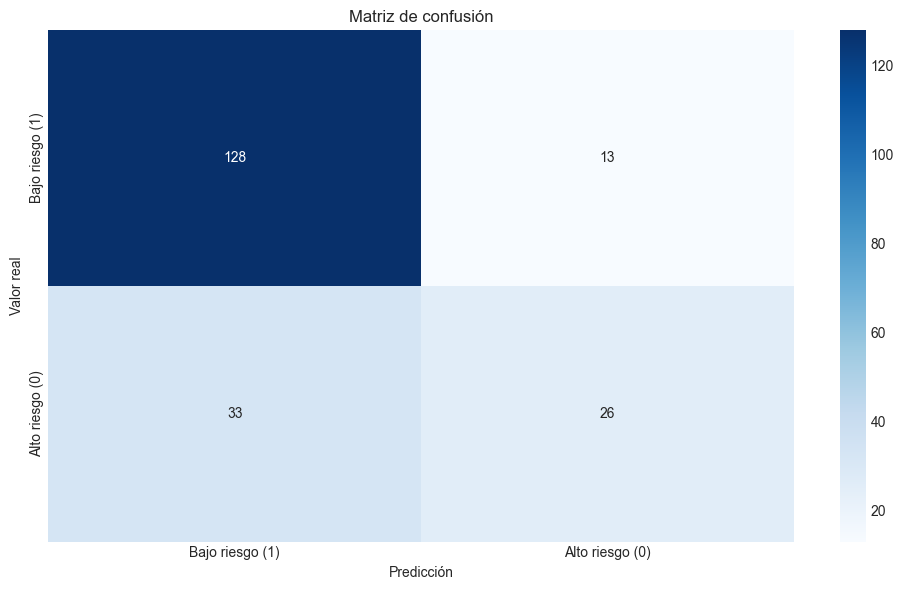

In [145]:
graficar_matriz_de_confusion(y_test, y_pred_pipeline)

# 3. Segundo método de mitigación

## 3.1 Aplicación del método y entrenamiento del modelo

In [146]:
from holisticai.bias.mitigation import PrejudiceRemover

mitigator = PrejudiceRemover(
    maxiter=100, fit_intercept=True, verbose=1, print_interval=1
)

model = LogisticRegression(random_state=42, max_iter=1000)

pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("bm_inprocessing", mitigator.transform_estimator(model)),
    ]
)

pipeline.fit(
    X_train,
    y_train,
    bm__group_a=X_train["genre_male"] == 1,
    bm__group_b=X_train["genre_male"] == 0,
)

y_pred_prejudice = pipeline.predict(
    X_test, bm__group_a=X_test["genre_male"] == 1, bm__group_b=X_test["genre_male"] == 0
)

metrics_prejudice = classification_bias_metrics(
    X_test["genre_male"] == 1,
    X_test["genre_male"] == 0,
    y_pred_prejudice,
    y_test,
    metric_type="both",
)

metrics["PrejudiceRemover"] = metrics_prejudice
print(metrics_prejudice)

[elapsed time: 00:00:00 | iter:5/100 | loss:400.8517]
[elapsed time: 00:00:00 | Best Loss : 400.8517]
                                       Value  Reference
Metric                                                 
Statistical Parity                 -0.058532          0
Disparate Impact                    0.931713          1
Four Fifths Rule                    0.931713          1
Cohen D                            -0.151043          0
2SD Rule                           -0.957166          0
Equality of Opportunity Difference -0.062594          0
False Positive Rate Difference     -0.064426          0
Average Odds Difference            -0.063510          0
Accuracy Difference                -0.018849          0


## 3.2 Evaluación del modelo mediante métricas de clasificación

In [147]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_prejudice))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.73      0.46      0.56        59
           1       0.80      0.93      0.86       141

    accuracy                           0.79       200
   macro avg       0.77      0.69      0.71       200
weighted avg       0.78      0.79      0.77       200



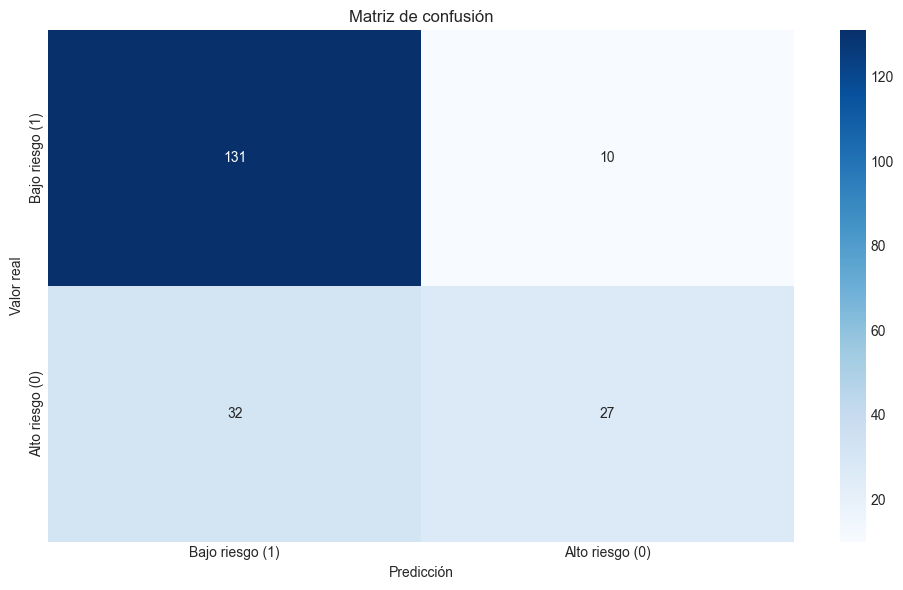

In [148]:
graficar_matriz_de_confusion(y_test, y_pred_prejudice)

# 4. Evaluación de equidad de modelos mitigados

In [149]:
keys = ["Baseline", "CorrelationRemover", "PrejudiceRemover", "Reference"]
comparison = pd.concat(
    [
        baseline["Value"],
        metrics_preprocessing_correlationRemover["Value"],
        metrics_prejudice,
    ],
    axis=1,
)
comparison.columns = keys


def highlight_closest(s):
    reference = s["Reference"]
    differences = s.drop("Reference").apply(lambda x: abs(x - reference))
    closest = differences.idxmin()
    return ["background-color: mediumseagreen" if x == s[closest] else "" for x in s]


comparison_highlighted = comparison.style.apply(highlight_closest, axis=1)
comparison_highlighted

,Baseline,CorrelationRemover,PrejudiceRemover,Reference
Metric,,,,
Statistical Parity,0.076389,-0.097222,-0.058532,0
Disparate Impact,1.101852,0.888889,0.931713,1
Four Fifths Rule,0.907563,0.888889,0.931713,1
Cohen D,0.193591,-0.246777,-0.151043,0
2SD Rule,1.224264,-1.558155,-0.957166,0
Equality of Opportunity Difference,0.049774,-0.056561,-0.062594,0
False Positive Rate Difference,0.124650,-0.205882,-0.064426,0
Average Odds Difference,0.087212,-0.131222,-0.063510,0
Accuracy Difference,0.002976,0.027778,-0.018849,0


# 5. Resumen y conclusiones

En este notebook hemos realizado las siguientes tareas:

1. **Preparación del entorno y carga de datos**: Se importaron los datos procesados de German Credit, ya preparados para el análisis y modelado.

2. **Aplicación de métodos de mitigación de sesgo**: Se implementaron dos enfoques para mitigar el sesgo de género en el modelo:
    - **CorrelationRemover** (preprocesamiento): Elimina la correlación entre las variables de entrada y el atributo protegido antes del entrenamiento.
    - **PrejudiceRemover** (in-processing): Incorpora una penalización durante el entrenamiento para reducir el sesgo en el modelo.

3. **Entrenamiento y evaluación de modelos mitigados**: Se entrenó un modelo de regresión logística bajo ambos métodos y se evaluó su desempeño mediante métricas de clasificación y fairness.

4. **Análisis de métricas de equidad**: Se compararon métricas como Statistical Parity, Disparate Impact, Four Fifths Rule, Cohen D, y otras, respecto a un valor de referencia ideal.

**Conclusiones:**

- El método **PrejudiceRemover** mostró una mejora más consistente en la mayoría de las métricas de equidad, logrando valores más cercanos al punto de referencia en Statistical Parity, Disparate Impact y Average Odds Difference.
- Al disminuir significativamente el modulo de la diferencia de FPR, este nuevo modelo cumple con Equalized Odds para un umbral de 0.1.
- El desempeño general del modelo mitigado se mantiene adecuado, con una exactitud del 79%. Sin embargo, persiste una diferencia en la sensibilidad para las clases: el modelo identifica mejor a los solicitantes de bajo riesgo (sensibilidad alta) que a los de alto riesgo.
- La mitigación del sesgo es posible sin sacrificar el desempeño global del modelo, aunque se recomienda seguir explorando técnicas y ajustando hiperparámetros para lograr un balance óptimo entre equidad y precisión.

# Conclusiones

## Índice de Contenido

1. [Preparación del entorno y carga de datos](#1-preparación-del-entorno-y-carga-de-datos)
    - [Reproducción del modelo original](#reproducimos-el-modelo-usado-en-la-notebook-3-entrenando-un-primer-modelo)
    - [Reproducción del modelo mitigado](#reproducimos-el-modelo-mitigado-usando-in-processing-prejudiceremover)
2. [Comparación de resultados](#2-comparación-de-resultados)
    - [Matrices generales](#21-modelos-en-general)
    - [Matrices por grupo](#22-matrices-de-confusión-por-grupo)
    - [Gráfico en conjunto](#23-gráfico-en-conjunto)

## 1. Preparación del entorno y carga de datos

In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from holisticai.bias.mitigation import PrejudiceRemover

# Carga de datos
ruta_X_train = os.path.join('..', 'data', 'processed', 'X_train.csv')
ruta_X_test = os.path.join('..', 'data', 'processed', 'X_test.csv')
ruta_y_train = os.path.join('..', 'data', 'processed', 'y_train.csv')
ruta_y_test = os.path.join('..', 'data', 'processed', 'y_test.csv')

X_train = pd.read_csv(ruta_X_train, index_col=0)
X_test = pd.read_csv(ruta_X_test, index_col=0)
y_train = pd.read_csv(ruta_y_train).values.ravel()
y_test = pd.read_csv(ruta_y_test).values.ravel()

### Reproducimos el modelo usado en la notebook 3 "Entrenando un primer modelo"

In [2]:
# Modelo baseline
scaler = StandardScaler()
baseline_model = LogisticRegression(
    random_state=42,
    max_iter=1000
)
pipe = Pipeline(
    [("Scaler", scaler),
    (("Baseline"), baseline_model)]
)
pipe.fit(X_train, y_train)

# Resultados del modelo baseline
y_pred_test = pipe.predict(X_test)
print("\tModelo Baseline: LogisticRegressor de scikit-learn\n\tReporte de clasificación\n\n", classification_report(y_true=y_test, y_pred=y_pred_test))

	Modelo Baseline: LogisticRegressor de scikit-learn
	Reporte de clasificación

               precision    recall  f1-score   support

           0       0.67      0.44      0.53        59
           1       0.80      0.91      0.85       141

    accuracy                           0.77       200
   macro avg       0.73      0.67      0.69       200
weighted avg       0.76      0.77      0.75       200



### Reproducimos el modelo mitigado usando _In-Processing_ _PrejudiceRemover_

In [3]:
# Necesito separar a los grupos de la variable sensible para fittear y predecir con PrejudiceRemover
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

group_a_train = X_train['genre_male'] == 1
group_b_train = X_train['genre_male'] == 0
group_a_test = X_test['genre_male'] == 1
group_b_test = X_test['genre_male'] == 0

# Modelo con mitigación
mitigator = PrejudiceRemover(
    maxiter=100,
    fit_intercept=True,
    print_interval=1
).transform_estimator(baseline_model)
mitigator.fit(X_train_scaled, y_train, group_a_train, group_b_train)

# Resultados del modelo con mitigación
y_mitigated_pred_test = mitigator.predict(X_test_scaled, group_a_test, group_b_test)
print("\tModelo Mitigado: PrejudiceRemover de holisticai\n\tReporte de clasificación\n\n", classification_report(y_true=y_test, y_pred=y_mitigated_pred_test))

	Modelo Mitigado: PrejudiceRemover de holisticai
	Reporte de clasificación

               precision    recall  f1-score   support

           0       0.73      0.46      0.56        59
           1       0.80      0.93      0.86       141

    accuracy                           0.79       200
   macro avg       0.77      0.69      0.71       200
weighted avg       0.78      0.79      0.77       200



## 2. Comparación de resultados

### 2.1 Modelos en general

In [4]:
# Generamos y juntamos las matrices de consufión para graficarlas
cm_baseline = confusion_matrix(
    y_test,
    y_pred_test,
    labels=[1, 0]
)

cm_mitigated = confusion_matrix(
    y_test,
    y_mitigated_pred_test,
    labels=[1, 0]
)

matrices = {
    "Modelo baseline": cm_baseline,
    "Modelo mitigado": cm_mitigated
}

### 2.2 Matrices de confusión por grupo

In [ ]:
# Índices de los grupos
idx_group_0 = y_test.index[y_test.index.isin(idx_test) & (group_a_test == False)]
idx_group_1 = y_test.index[y_test.index.isin(idx_test) & (group_a_test == True)]
y_test_female = y_test.loc[idx_group_0]
y_test_male = y_test.loc[idx_group_1]
y_pred_test_female = y_pred_test[[i for i, idx in enumerate(idx_test) if idx in idx_group_0]]
y_pred_test_male = y_pred_test[[i for i, idx in enumerate(idx_test) if idx in idx_group_1]]
y_mitigated_pred_test_female = y_mitigated_pred_test[[i for i, idx in enumerate(idx_test) if idx in idx_group_0]]
y_mitigated_pred_test_male = y_mitigated_pred_test[[i for i, idx in enumerate(idx_test) if idx in idx_group_1]]

# Para el modelo sin mitigación
cm_female = confusion_matrix(
    y_test_female,
    y_pred_test_female,
    labels=[1, 0]
)
cm_male = confusion_matrix(
    y_test_male,
    y_pred_test_male,
    labels=[1, 0]
)

# Para el modelo mitigado
cm_mitigated_female = confusion_matrix(
    y_test_female,
    y_mitigated_pred_test_female,
    labels=[1, 0]
)
cm_mitigated_male = confusion_matrix(
    y_test_male,
    y_mitigated_pred_test_male,
    labels=[1, 0]
)

matrices.update({
    "Modelo baseline para mujeres": cm_female,
    "Modelo mitigado para mujeres": cm_mitigated_female,
    "Modelo baseline para hombres": cm_male,
    "Modelo mitigado para hombres": cm_mitigated_male
})

### 2.3 Gráfico en conjunto

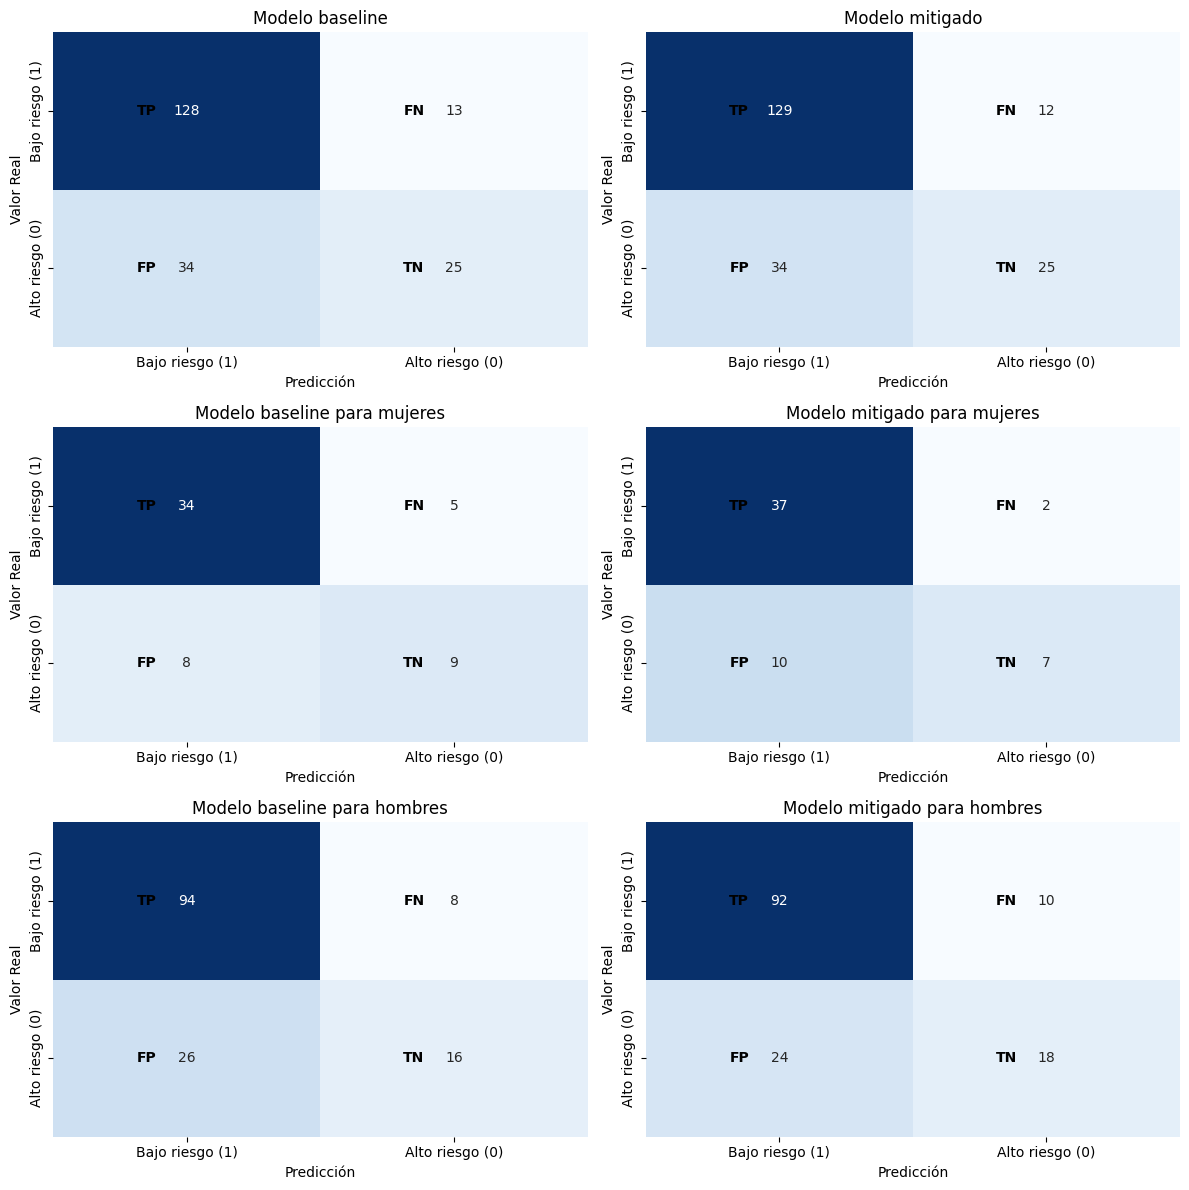

In [7]:
# Visualizamos las matrices de confusión
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
labels = ['Bajo riesgo (1)', 'Alto riesgo (0)']
ax = ax.ravel()

i = 0
for titulo, matriz in matrices.items():
    current_ax = ax[i]

    # Cada uno de los heatmaps
    sns.heatmap(
        matriz,
        annot=True,
        fmt="d",
        cmap="Blues",
        ax=current_ax,
        cbar=False,
        xticklabels=labels,
        yticklabels=labels
    )

    # Agrego labels de referencia para mayor claridad
    for (j, k), val in np.ndenumerate(matriz):
        if j == 0 and k == 0:
            label = "TP"
        elif j == 1 and k == 0:
            label = "FP"
        elif j == 0 and k == 1:
            label = "FN"
        else:
            label = "TN"
        current_ax.text(
            k + 0.35, j + 0.5,
            label,
            color="black",
            ha="center",
            va="center",
            fontsize=10,
            fontweight="bold"
        )

    #  Configuraciones de labels
    current_ax.set_title(titulo)
    current_ax.set_xlabel("Predicción")
    current_ax.set_ylabel("Valor Real")
    i = i+1

plt.tight_layout()
plt.show()

El modelo entrenado con `PrejudiceRemover` mejoró la _performance_ para el grupo de mujeres, incrementando la cantidad de Positivos Verdaderos (TP, _True Positive_) en 3 casos, además de mejorar en 1 caso los TP del modelo en general. Se pierde un poco la perfomance del grupo privilegiado en el modelo basae, pero se gana en _fairness_, (equidad o igualdad) para los grupos estudiados.

In [8]:
tp_female = [ix for k, ix in enumerate(idx_group_0) if y_test_female[ix] == 1 and y_pred_test_female[k] == 1]
tp_male = [ix for k, ix in enumerate(idx_group_1) if y_test_male[ix] == 1 and y_pred_test_male[k] == 1]
new_tp_female = [ix for k, ix in enumerate(idx_group_0) if y_test_female[ix] == 1 and y_mitigated_pred_test_female[k] == 1 and y_pred_test_female[k] == 0]

df_women_base = german_credit_df.loc[tp_female]
df_men = german_credit_df.loc[tp_male]
df_women_mitigated = german_credit_df.loc[new_tp_female]

In [9]:
# Suponiendo que `df_women` y `df_men` son los DataFrames filtrados
variables_numericas = ['credit_amount', 'duration']
print("Promedios:\n")
print("Mujeres (Baseline):\n", df_women_base[variables_numericas].mean())
print("\nHombres (Baseline):\n", df_men[variables_numericas].mean())
print("\nMujeres (Mitigado):\n", df_women_mitigated[variables_numericas].mean())


Promedios:

Mujeres (Baseline):
 credit_amount    2228.058824
duration           15.941176
dtype: float64

Hombres (Baseline):
 credit_amount    2678.446809
duration           17.000000
dtype: float64

Mujeres (Mitigado):
 credit_amount    3336.0
duration           18.0
dtype: float64


In [10]:
categoricas = ['checking_account_no account', 'credit_history_critical account / other bank', 'housing_own', 'savings_account_unknown / no account', 'property_real estate']
for col in categoricas:
    print(f"\nDistribución de {col}:")
    print("Mujeres (Baseline):\n", df_women_base[col].value_counts(normalize=True).sort_index())
    print("Hombres (Baseline):\n", df_men[col].value_counts(normalize=True).sort_values().sort_index())
    print("Mujeres (Mitigado):\n", df_women_mitigated[col].value_counts(normalize=True).sort_values().sort_index())



Distribución de checking_account_no account:
Mujeres (Baseline):
 checking_account_no account
0    0.323529
1    0.676471
Name: proportion, dtype: float64
Hombres (Baseline):
 checking_account_no account
0    0.521277
1    0.478723
Name: proportion, dtype: float64
Mujeres (Mitigado):
 checking_account_no account
0    1.0
Name: proportion, dtype: float64

Distribución de credit_history_critical account / other bank:
Mujeres (Baseline):
 credit_history_critical account / other bank
0    0.617647
1    0.382353
Name: proportion, dtype: float64
Hombres (Baseline):
 credit_history_critical account / other bank
0    0.638298
1    0.361702
Name: proportion, dtype: float64
Mujeres (Mitigado):
 credit_history_critical account / other bank
0    0.666667
1    0.333333
Name: proportion, dtype: float64

Distribución de housing_own:
Mujeres (Baseline):
 housing_own
0    0.323529
1    0.676471
Name: proportion, dtype: float64
Hombres (Baseline):
 housing_own
0    0.234043
1    0.765957
Name: proporti